# ***Solar Power Output Prediction System***

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# pd.set_option('display.max_columns',None)

#### *Formating the Dataset*

In [18]:
df =  pd.read_csv("Dataset.csv")

In [20]:
df.columns

Index(['Unnamed: 0', 'Time', 'Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Insolation', 'Solar Power Output',
       'Solar Cell Temperature', 'Wind Speed', 'Wind turbine Power Output',
       'Wind turbine Operating Status', 'Ambient Temperature',
       'AC Primary Load', 'AC Primary Load Served',
       'Autosize Genset Power Output', 'Autosize Genset Operating Status',
       'Autosize Genset Fuel', 'Total Electrical Load Served',
       'Renewable Penetration', 'Excess Electrical Production',
       'Unmet Electrical Load', 'Total Renewable Power Output',
       'Inverter Power Input', 'Inverter Power Output',
       'Rectifier Power Input', 'Rectifier Power Output',
       'Battery Maximum Charge Power', 'Battery Maximum Discharge Power',
       'Battery Charge Power', 'Battery Discharge Power',
       'Battery Input Power', 'Battery Energy Content',
       'Battery State of Charge', 'Battery Energy Cost',
       'AC Required Operati

In [21]:
df["Time"]  = pd.to_datetime(df["Time"],format="mixed")

df[['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Insolation',
       'Solar Power Output', 'Solar Cell Temperature', 'Wind Speed',
       'Wind turbine Power Output', 'Wind turbine Operating Status',
       'Ambient Temperature', 'AC Primary Load', 'AC Primary Load Served',
       'Autosize Genset Power Output', 'Autosize Genset Operating Status',
       'Autosize Genset Fuel', 'Total Electrical Load Served',
       'Renewable Penetration', 'Excess Electrical Production',
       'Unmet Electrical Load', 'Total Renewable Power Output',
       'Inverter Power Input', 'Inverter Power Output',
       'Rectifier Power Input', 'Rectifier Power Output',
       'Battery Maximum Charge Power', 'Battery Maximum Discharge Power',
       'Battery Charge Power', 'Battery Discharge Power',
       'Battery Input Power', 'Battery Energy Content',
       'Battery State of Charge', 'Battery Energy Cost',
       'AC Required Operating Capacity', 'DC Required Operating Capacity',
       'AC Operating Capacity', 'DC Operating Capacity']] = df[['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Insolation',
       'Solar Power Output', 'Solar Cell Temperature', 'Wind Speed',
       'Wind turbine Power Output', 'Wind turbine Operating Status',
       'Ambient Temperature', 'AC Primary Load', 'AC Primary Load Served',
       'Autosize Genset Power Output', 'Autosize Genset Operating Status',
       'Autosize Genset Fuel', 'Total Electrical Load Served',
       'Renewable Penetration', 'Excess Electrical Production',
       'Unmet Electrical Load', 'Total Renewable Power Output',
       'Inverter Power Input', 'Inverter Power Output',
       'Rectifier Power Input', 'Rectifier Power Output',
       'Battery Maximum Charge Power', 'Battery Maximum Discharge Power',
       'Battery Charge Power', 'Battery Discharge Power',
       'Battery Input Power', 'Battery Energy Content',
       'Battery State of Charge', 'Battery Energy Cost',
       'AC Required Operating Capacity', 'DC Required Operating Capacity',
       'AC Operating Capacity', 'DC Operating Capacity']].apply(pd.to_numeric)

In [22]:
# df.to_csv("corrected_dataset.csv")

In [23]:
df.drop(['Wind Speed',
       'Wind turbine Power Output', 'Wind turbine Operating Status',
       'Ambient Temperature', 'AC Primary Load', 'AC Primary Load Served',
       'Autosize Genset Power Output', 'Autosize Genset Operating Status',
       'Autosize Genset Fuel', 'Total Electrical Load Served',
       'Renewable Penetration', 'Excess Electrical Production',
       'Unmet Electrical Load', 'Total Renewable Power Output',
       'Inverter Power Input', 'Inverter Power Output',
       'Rectifier Power Input', 'Rectifier Power Output',
       'Battery Maximum Charge Power', 'Battery Maximum Discharge Power',
       'Battery Charge Power', 'Battery Discharge Power',
       'Battery Input Power', 'Battery Energy Content',
       'Battery State of Charge', 'Battery Energy Cost',
       'AC Required Operating Capacity', 'DC Required Operating Capacity',
       'AC Operating Capacity', 'DC Operating Capacity'],axis=1,inplace=True)

In [24]:
df

Unnamed: 0                Time  Global Solar  Solar Altitude  \
0              0 2007-01-01 00:00:00           0.0             0.0   
1              1 2007-01-01 01:00:00           0.0             0.0   
2              2 2007-01-01 02:00:00           0.0             0.0   
3              3 2007-01-01 03:00:00           0.0             0.0   
4              4 2007-01-01 04:00:00           0.0             0.0   
...          ...                 ...           ...             ...   
8755        8755 2007-12-31 19:00:00           0.0             0.0   
8756        8756 2007-12-31 20:00:00           0.0             0.0   
8757        8757 2007-12-31 21:00:00           0.0             0.0   
8758        8758 2007-12-31 22:00:00           0.0             0.0   
8759        8759 2007-12-31 23:00:00           0.0             0.0   

      Solar Azimuth  Solar Angle of Incidence  Solar Insolation  \
0          -6.78795                      90.0               0.0   
1         -45.35176                      90.0               0.0   
2         -60.21218                      90.0               0.0   
3         -65.94936                      90.0               0.0   
4         -68.03603                      90.0               0.0   
...             ...                       ...               ...   
8755       68.21178                      90.0               0.0   
8756       67.63509                      90.0               0.0   
8757       64.81570                      90.0               0.0   
8758       57.46185                      90.0               0.0   
8759       38.08067                      90.0               0.0   

      Solar Power Output  Solar Cell Temperature  
0                    0.0                25.63279  
1                    0.0                25.63279  
2                    0.0                25.63279  
3                    0.0                25.63279  
4                    0.0                25.63279  
...                  ...                     ...  
8755                 0.0                25.52278  
8756                 0.0                25.52278  
8757                 0.0                25.52278  
8758                 0.0                25.52278  
8759                 0.0                25.52278  

[8760 rows x 9 columns]

In [25]:
df.columns

Index(['Unnamed: 0', 'Time', 'Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Insolation', 'Solar Power Output',
       'Solar Cell Temperature'],
      dtype='object')

#### *Correlation between Features*

Text(0.5, 1.0, 'Correlation Heatmap')

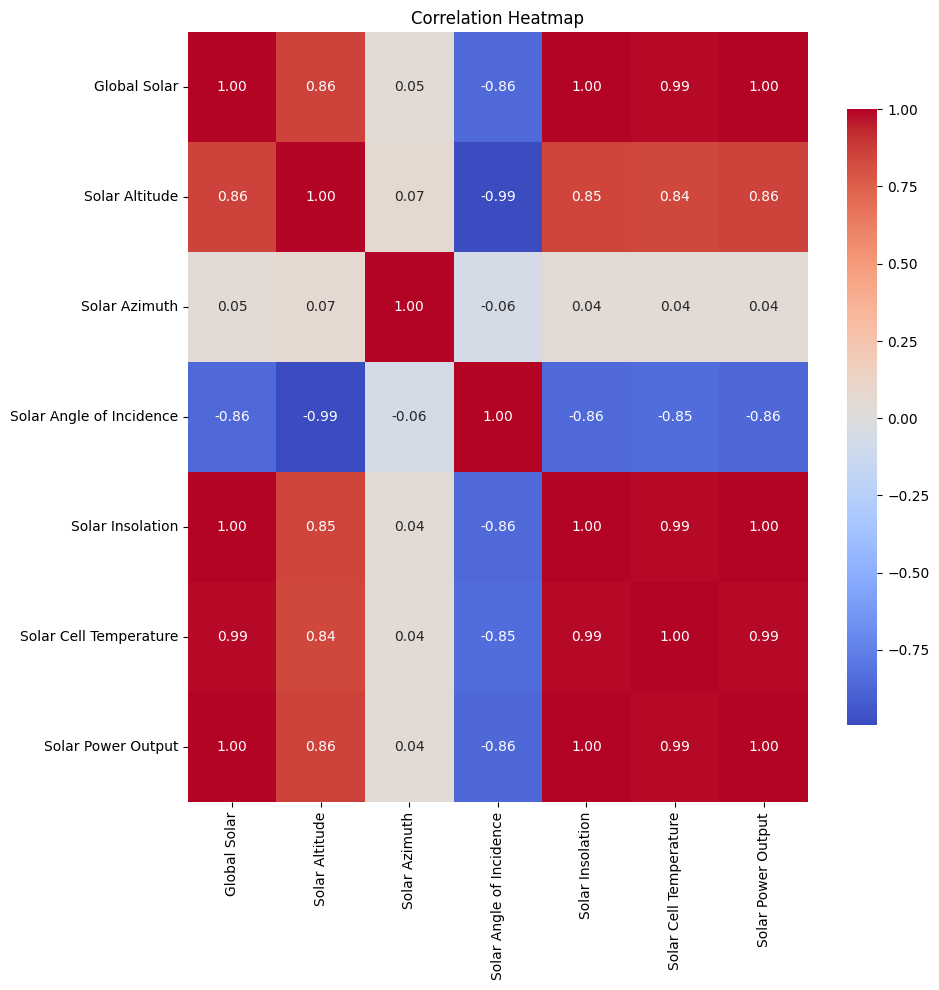

In [26]:
columns = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
           'Solar Angle of Incidence', 'Solar Insolation',
           'Solar Cell Temperature', 'Solar Power Output']
corr = df[columns].corr()
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f",ax = ax,cbar_kws={"shrink":.8})
ax.set_title("Correlation Heatmap")

#### *Dataset Features Information*

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                8760 non-null   int64         
 1   Time                      8760 non-null   datetime64[ns]
 2   Global Solar              8760 non-null   float64       
 3   Solar Altitude            8760 non-null   float64       
 4   Solar Azimuth             8760 non-null   float64       
 5   Solar Angle of Incidence  8760 non-null   float64       
 6   Solar Insolation          8760 non-null   float64       
 7   Solar Power Output        8760 non-null   float64       
 8   Solar Cell Temperature    8760 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 616.1 KB


#### *Checking Zero Values* 

In [28]:
for column in columns:
    print(column, ": ", (df[column]==0).sum())


Global Solar :  4074
Solar Altitude :  4386
Solar Azimuth :  0
Solar Angle of Incidence :  0
Solar Insolation :  4386
Solar Cell Temperature :  0
Solar Power Output :  4386


In [29]:
df

Unnamed: 0                Time  Global Solar  Solar Altitude  \
0              0 2007-01-01 00:00:00           0.0             0.0   
1              1 2007-01-01 01:00:00           0.0             0.0   
2              2 2007-01-01 02:00:00           0.0             0.0   
3              3 2007-01-01 03:00:00           0.0             0.0   
4              4 2007-01-01 04:00:00           0.0             0.0   
...          ...                 ...           ...             ...   
8755        8755 2007-12-31 19:00:00           0.0             0.0   
8756        8756 2007-12-31 20:00:00           0.0             0.0   
8757        8757 2007-12-31 21:00:00           0.0             0.0   
8758        8758 2007-12-31 22:00:00           0.0             0.0   
8759        8759 2007-12-31 23:00:00           0.0             0.0   

      Solar Azimuth  Solar Angle of Incidence  Solar Insolation  \
0          -6.78795                      90.0               0.0   
1         -45.35176                      90.0               0.0   
2         -60.21218                      90.0               0.0   
3         -65.94936                      90.0               0.0   
4         -68.03603                      90.0               0.0   
...             ...                       ...               ...   
8755       68.21178                      90.0               0.0   
8756       67.63509                      90.0               0.0   
8757       64.81570                      90.0               0.0   
8758       57.46185                      90.0               0.0   
8759       38.08067                      90.0               0.0   

      Solar Power Output  Solar Cell Temperature  
0                    0.0                25.63279  
1                    0.0                25.63279  
2                    0.0                25.63279  
3                    0.0                25.63279  
4                    0.0                25.63279  
...                  ...                     ...  
8755                 0.0                25.52278  
8756                 0.0                25.52278  
8757                 0.0                25.52278  
8758                 0.0                25.52278  
8759                 0.0                25.52278  

[8760 rows x 9 columns]

#### *Exploratory Data Analysis* 

In [30]:
colors = ["skyblue","salmon","green","purple", "orange","red"]
features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation']

#### *Histogram*

In [31]:
def plot_histplot(df,colors,features):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
    fig.suptitle("Distribution Plots for Features")

    # Flatten the axes array
    axes = axes.flatten()
    
    # Plot histograms and density plots
    for i, feature in enumerate(features ): 
        color = colors[i % len(colors)]  # Cycle through colors
        sns.histplot(df[feature], kde=True, ax=axes[i], color=color)
        axes[i].set_title(f"{feature} Distribution")

    # Remove unused subplots
    if len(features) < len(axes):
        for j in range(len(features), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


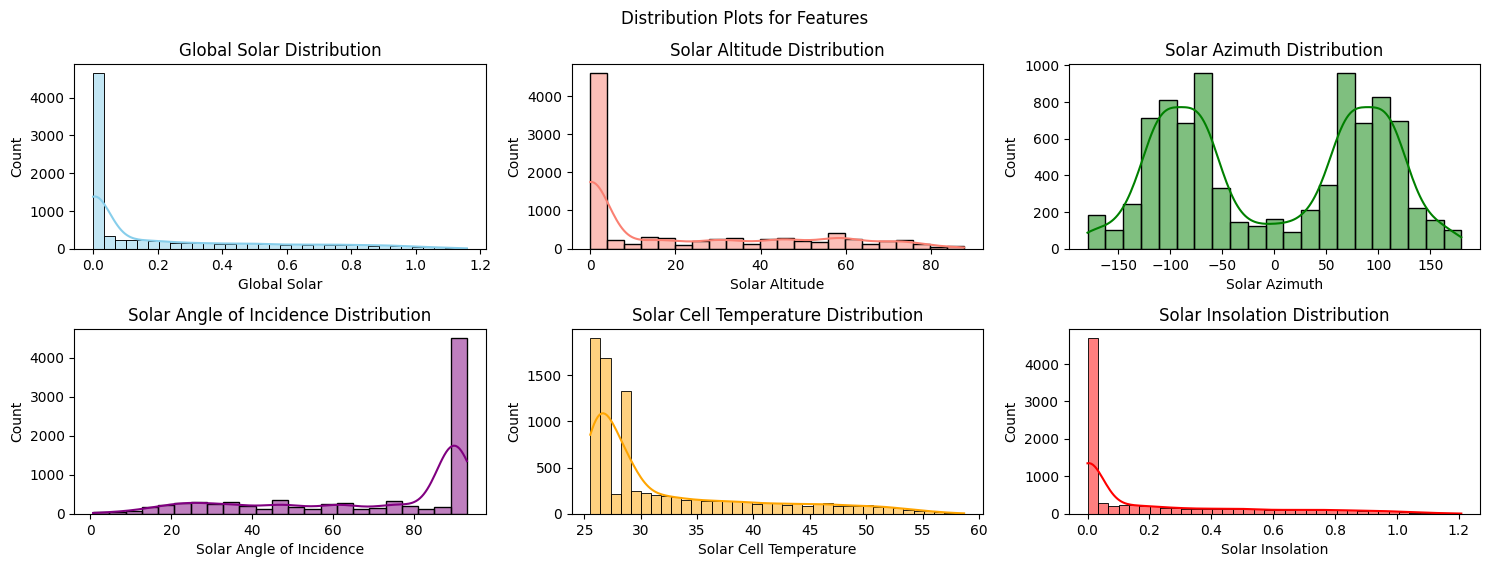

In [32]:
plot_histplot(df,colors,features)

### *Line plot over year*

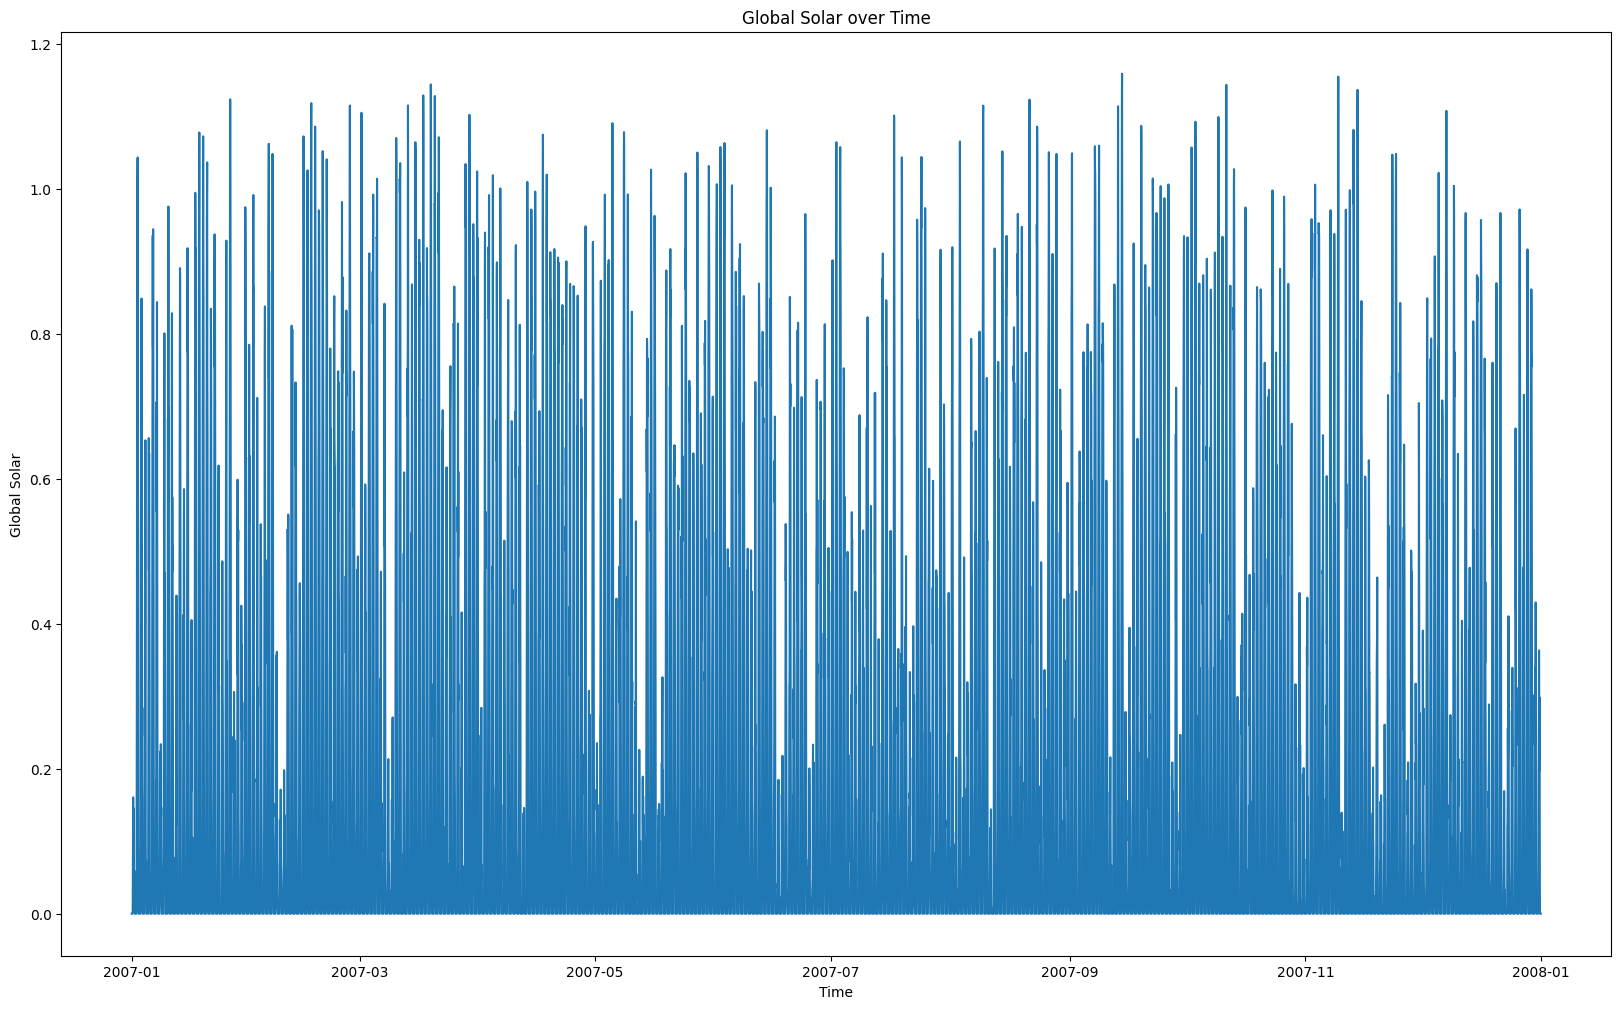

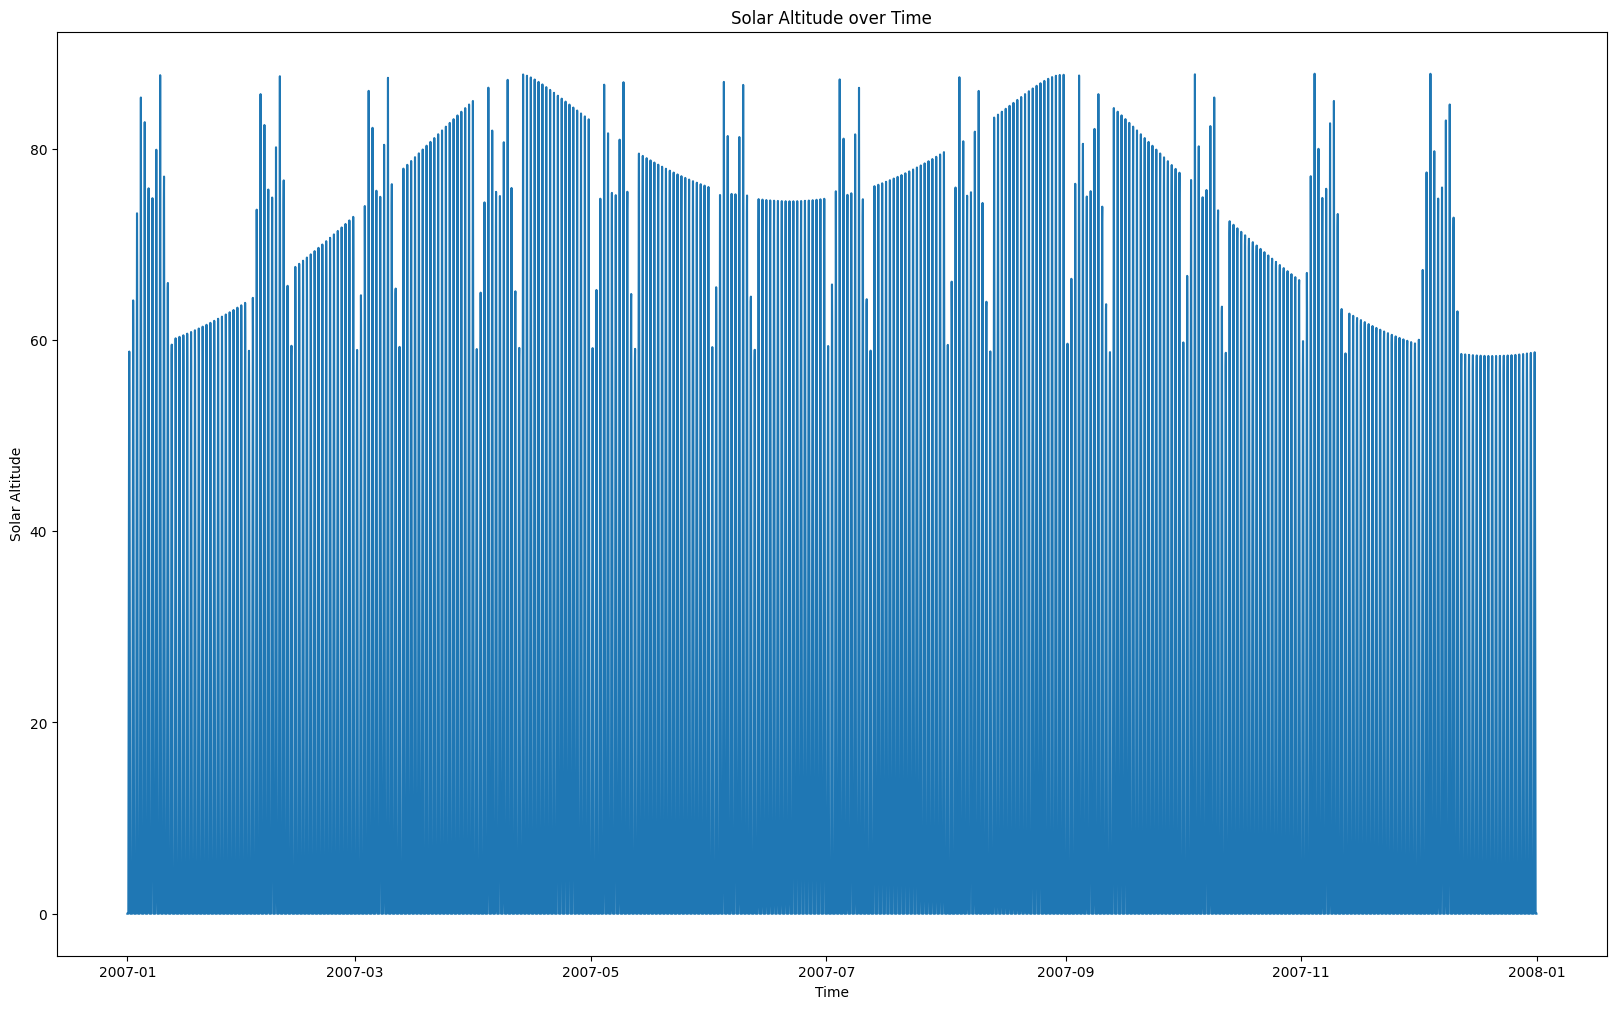

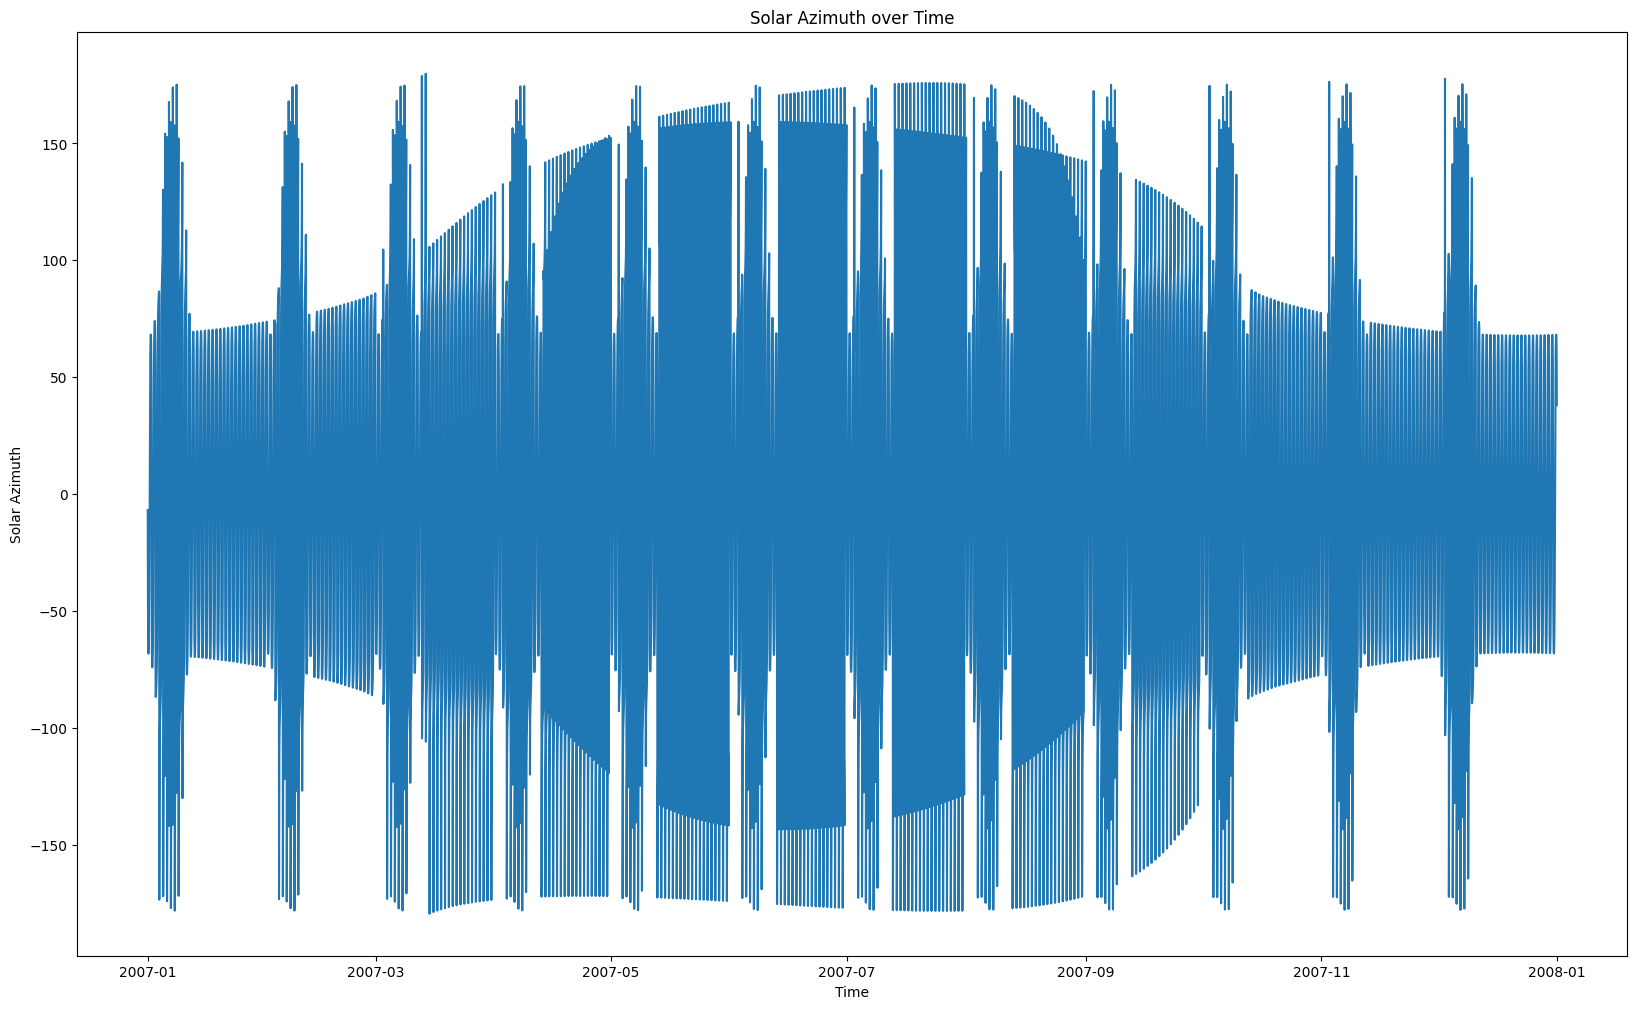

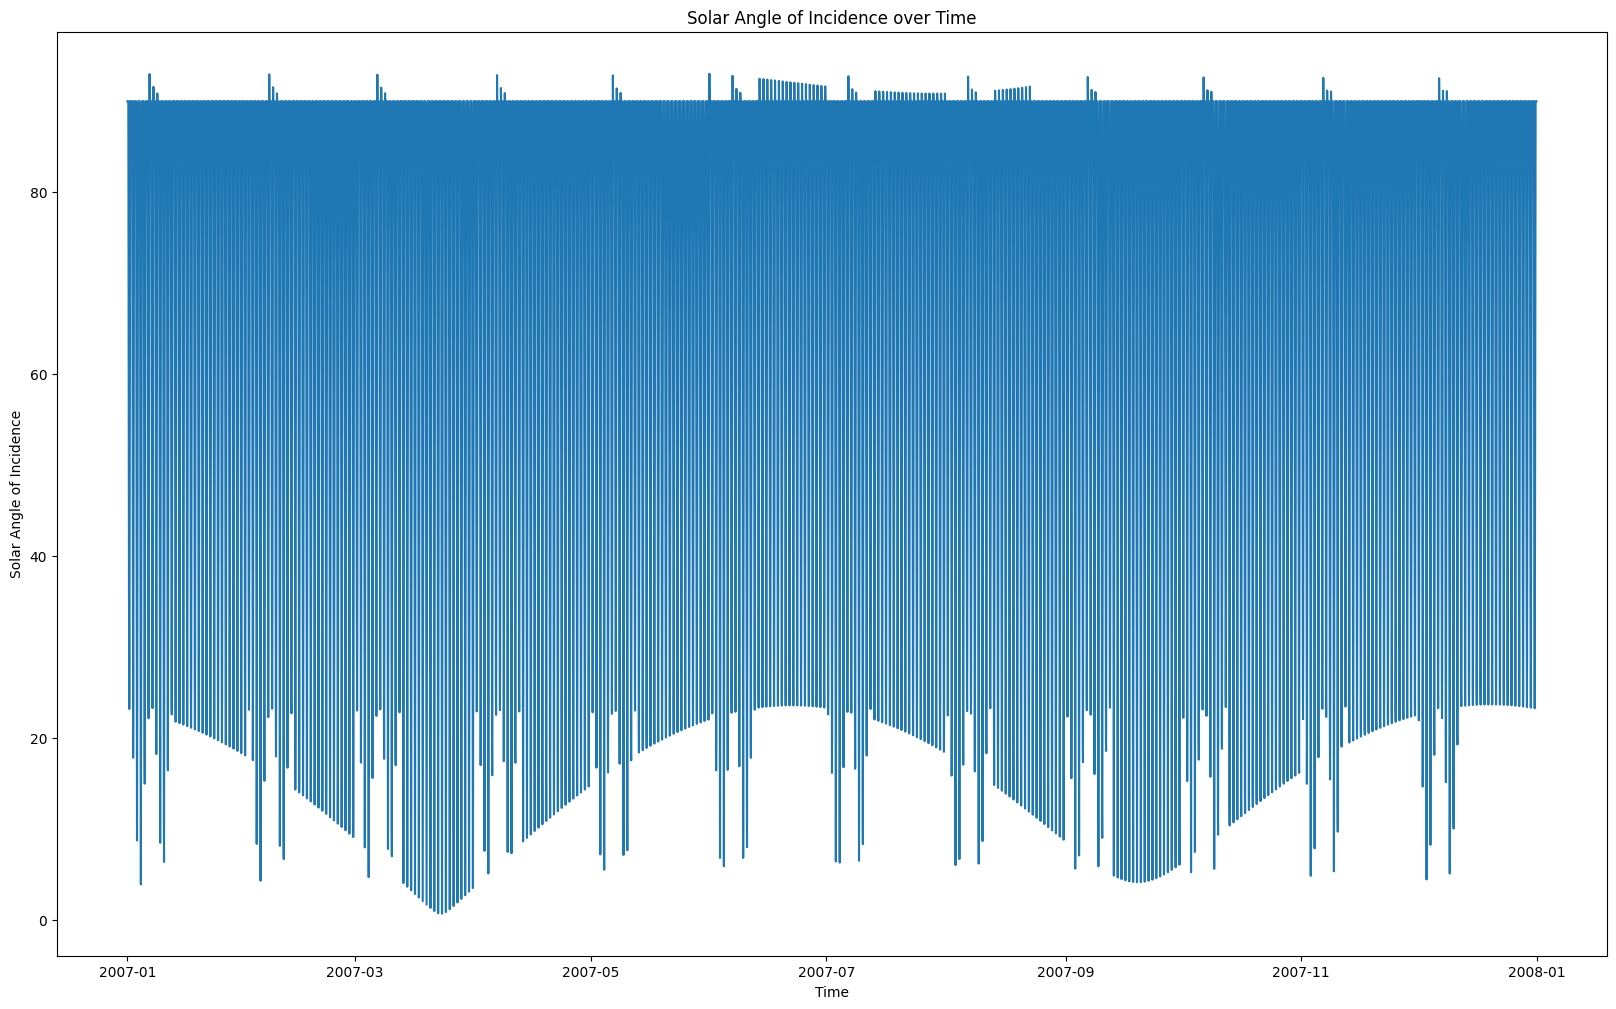

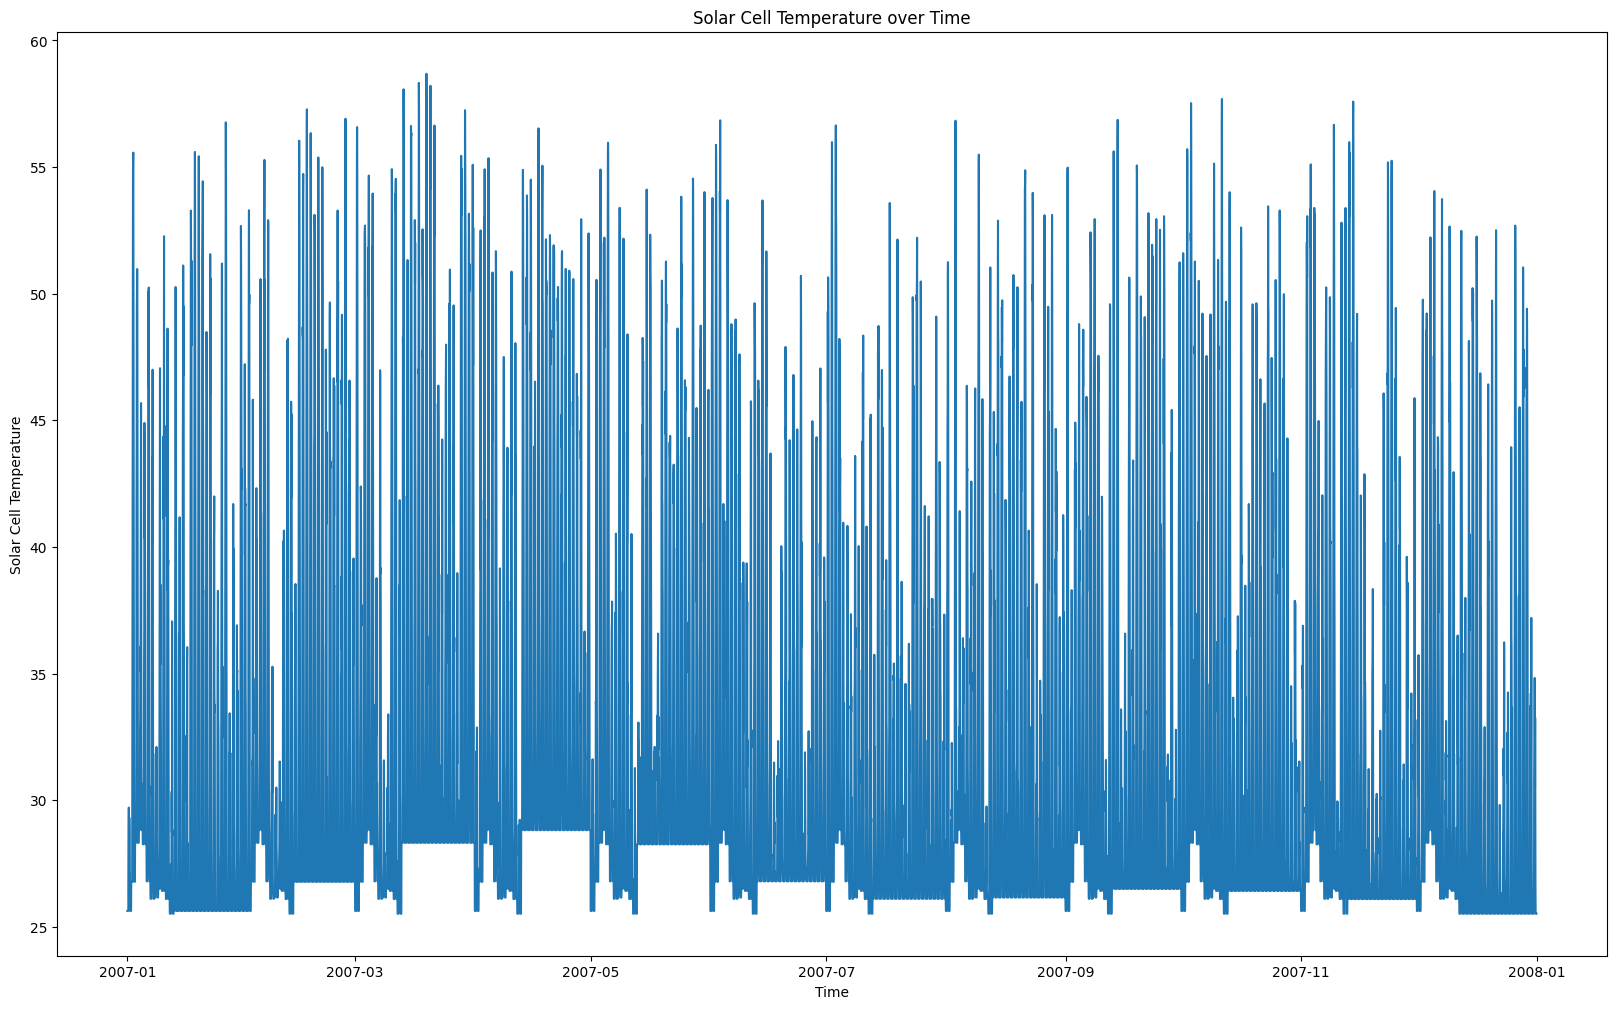

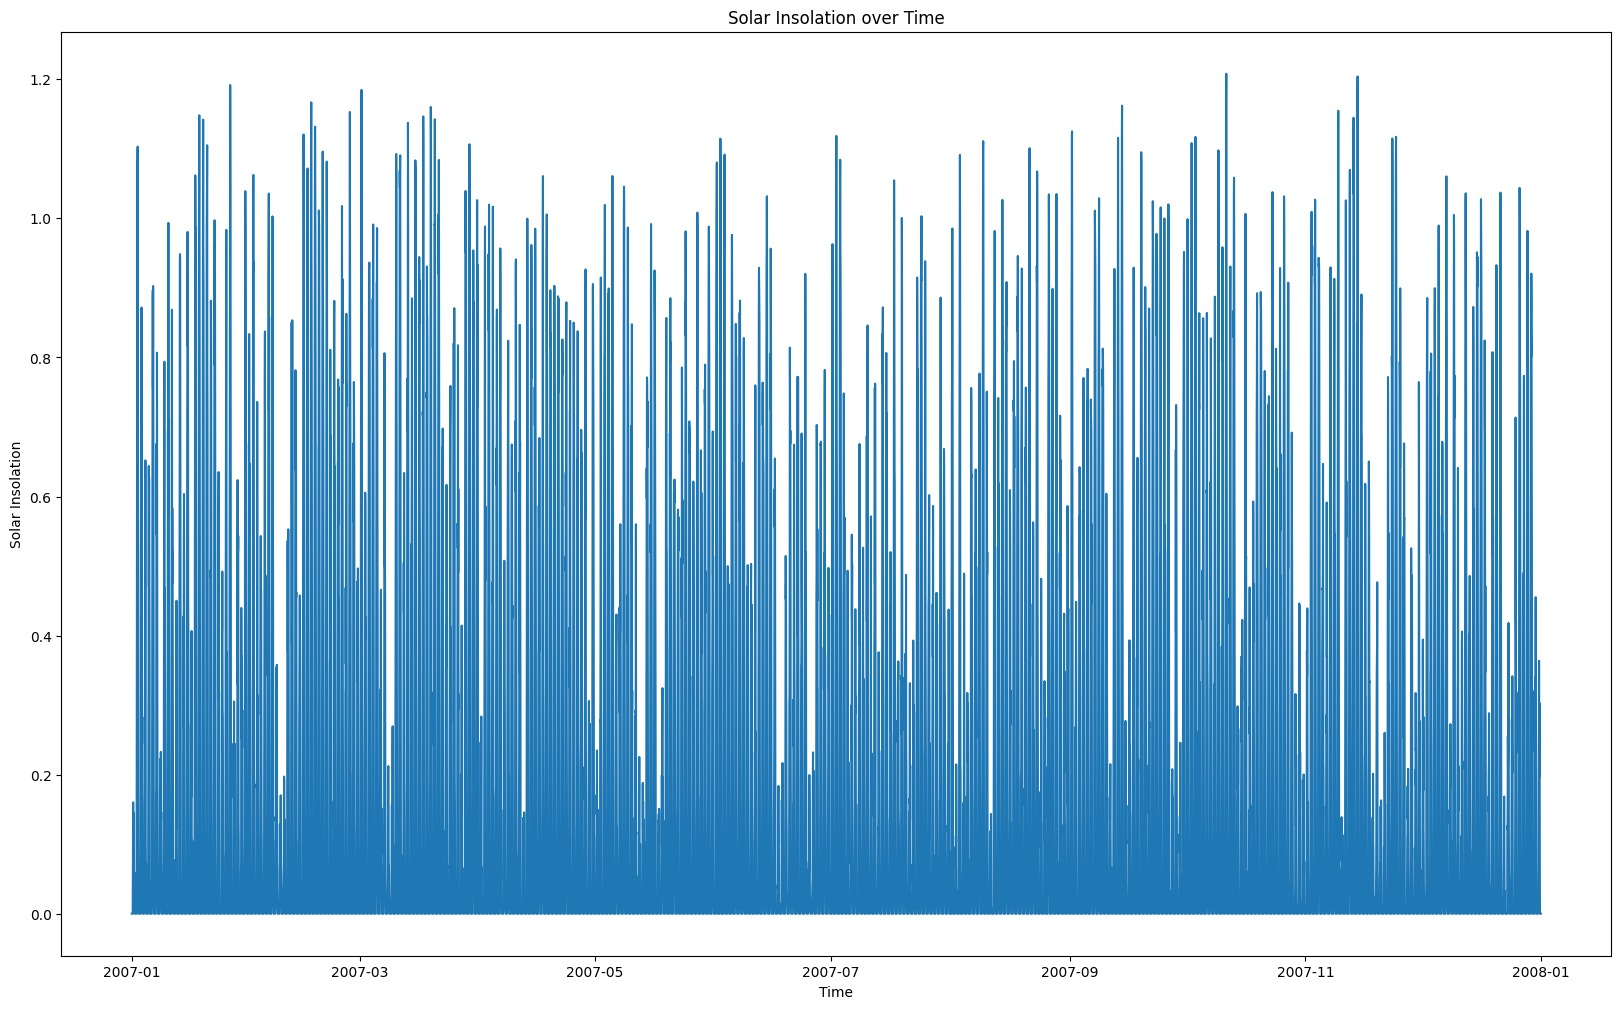

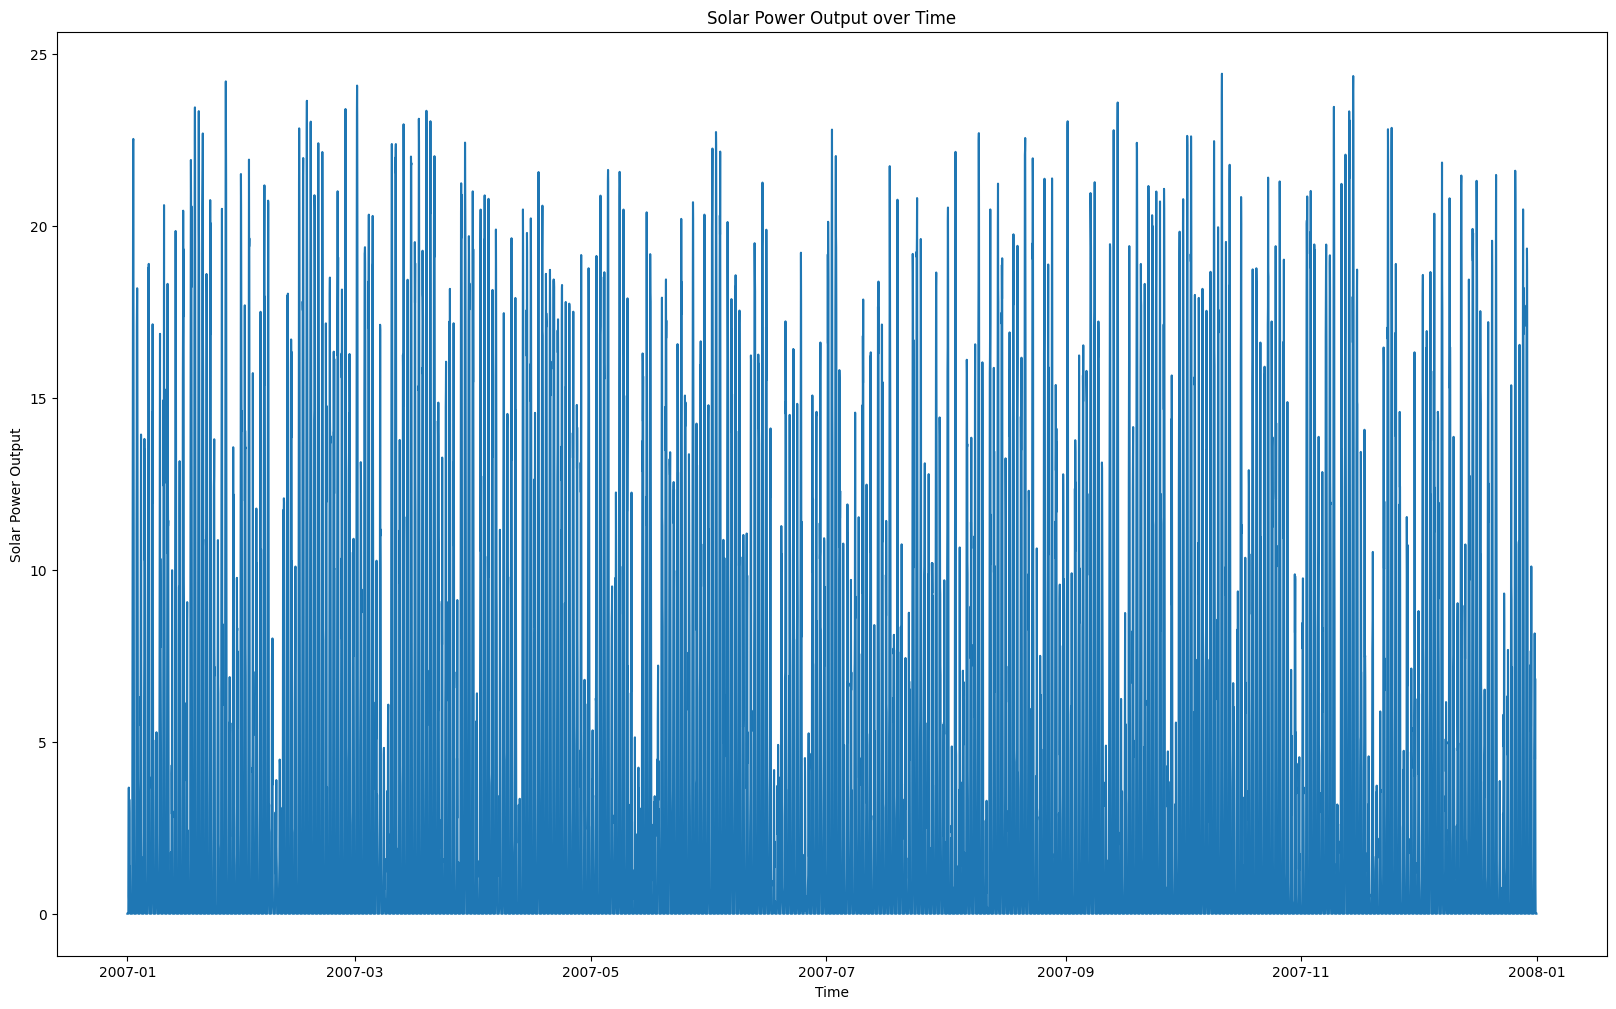

In [33]:
features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation','Solar Power Output']
for feature in features:
    plt.figure(figsize=(20, 12))
    sns.lineplot(x="Time", y=feature, data=df)
    plt.title(f'{feature} over Time')
    plt.show()

#### *Line plot over day*

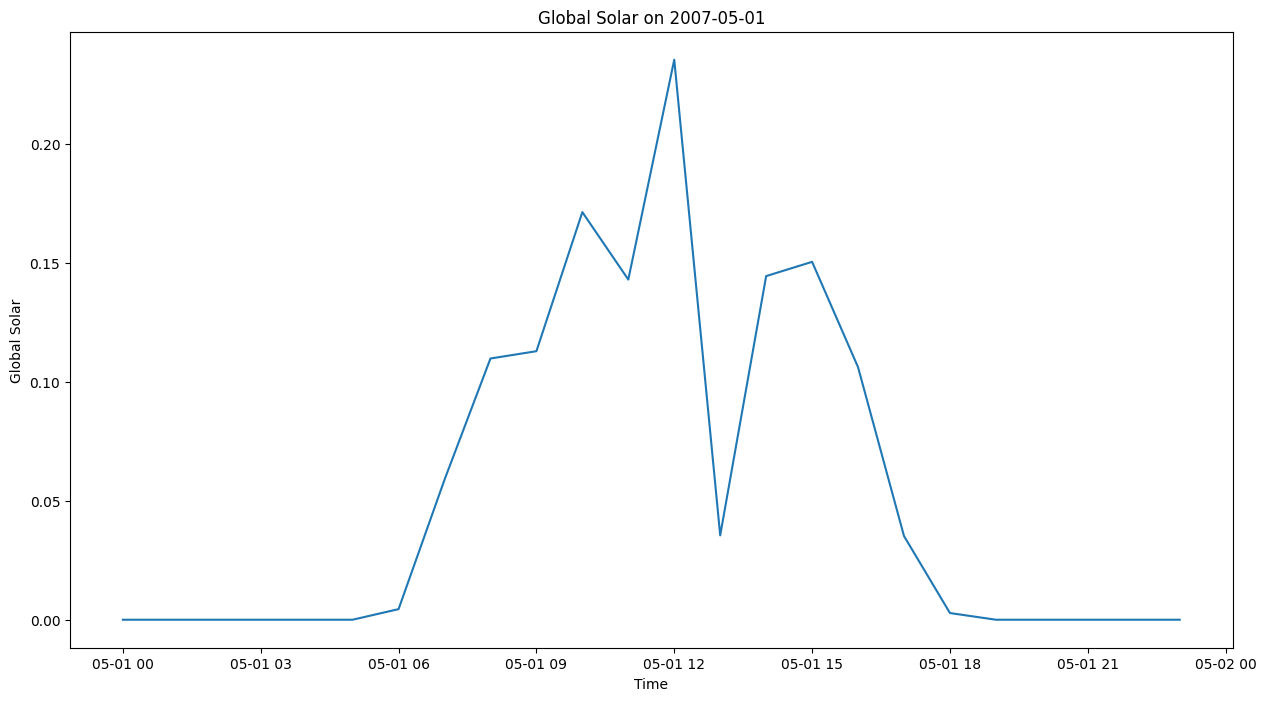

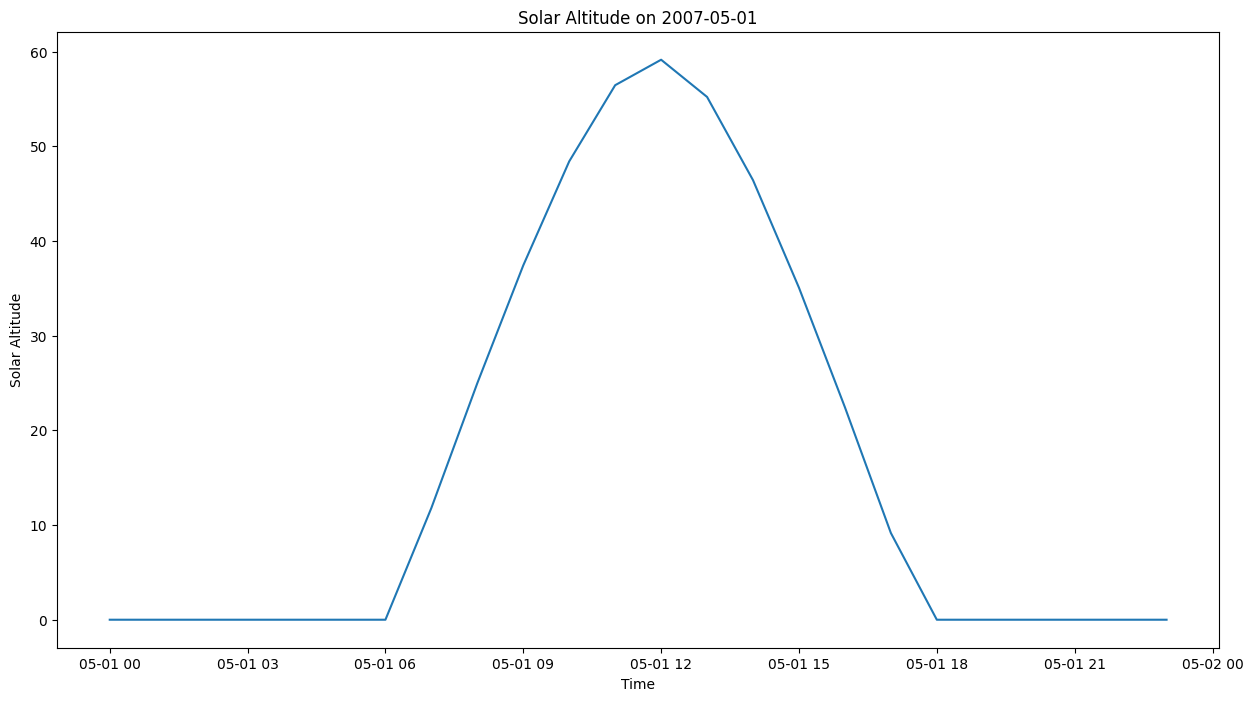

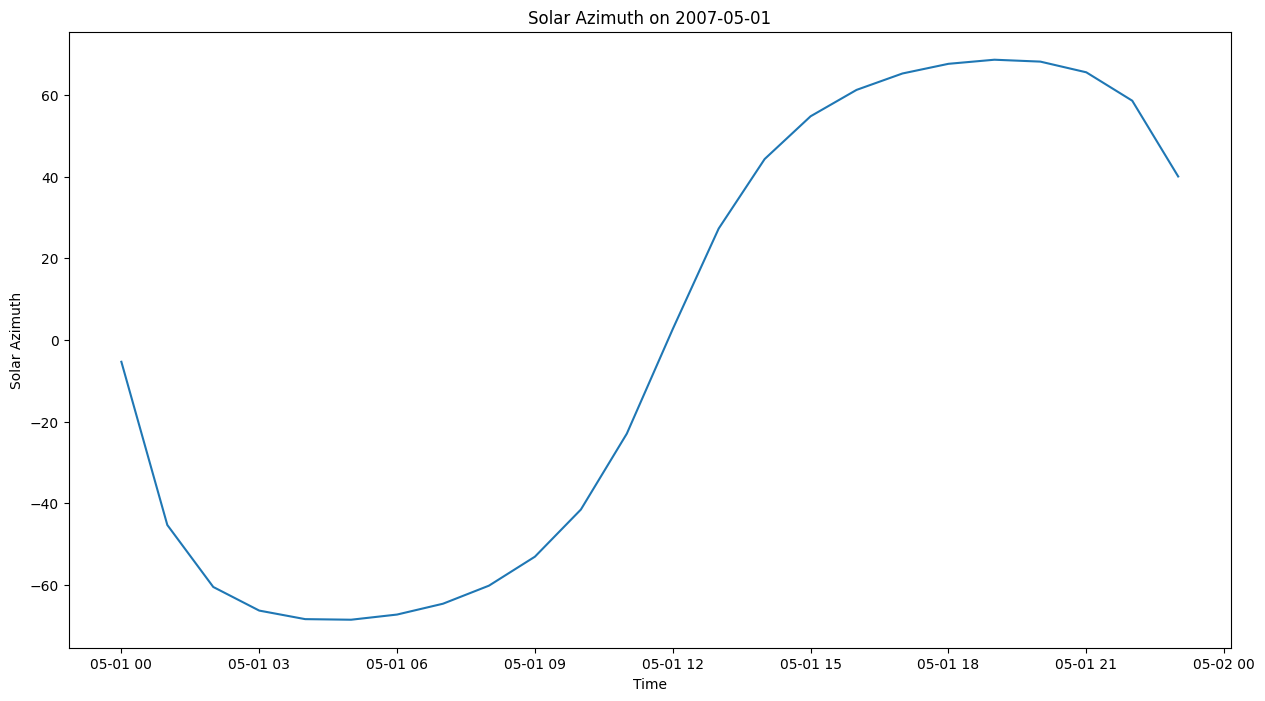

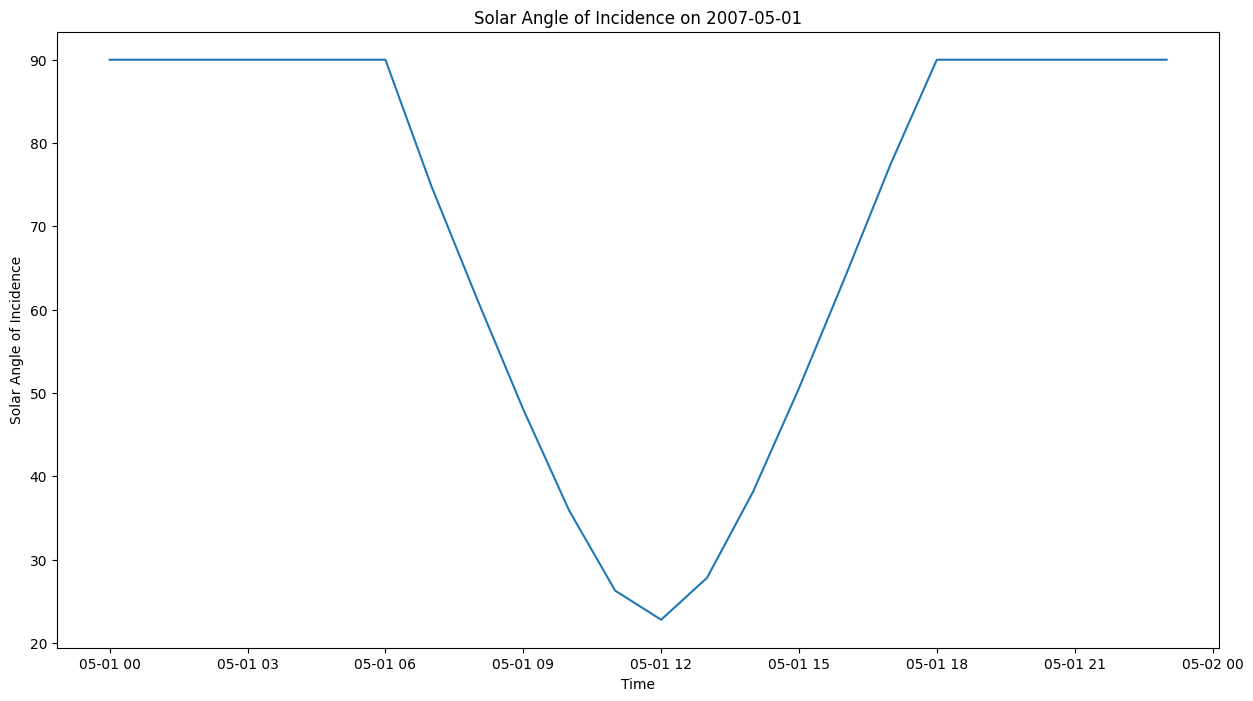

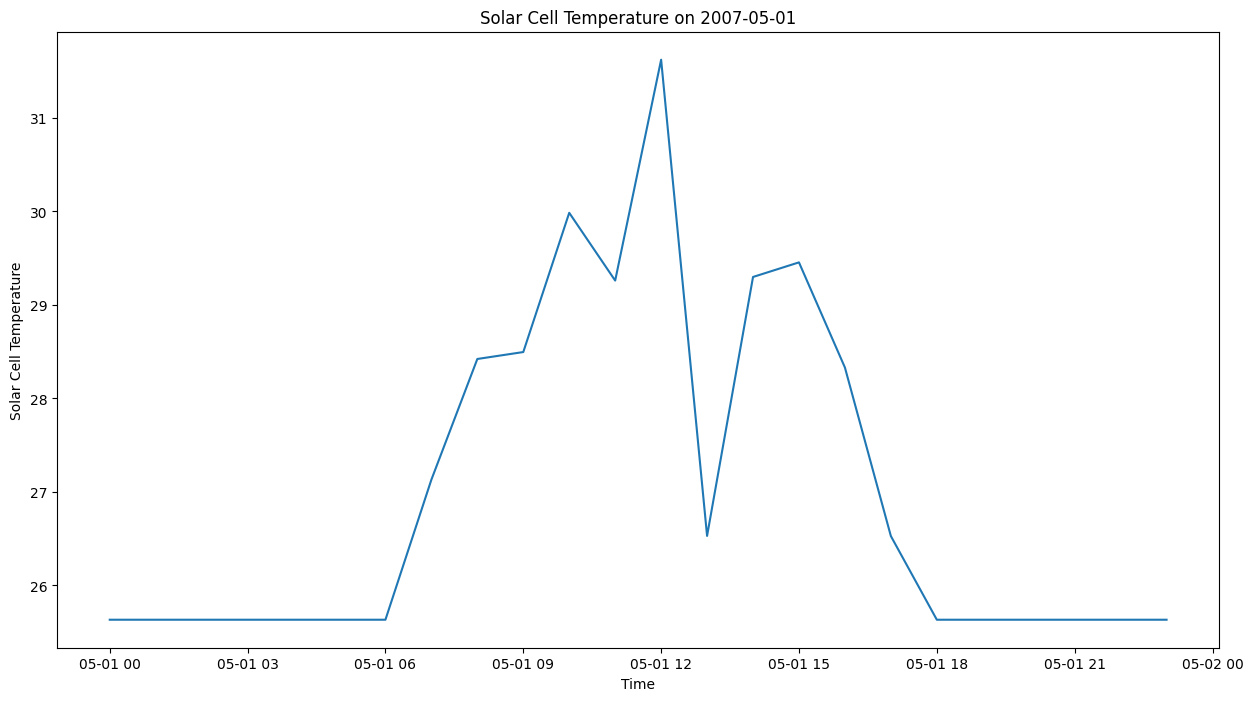

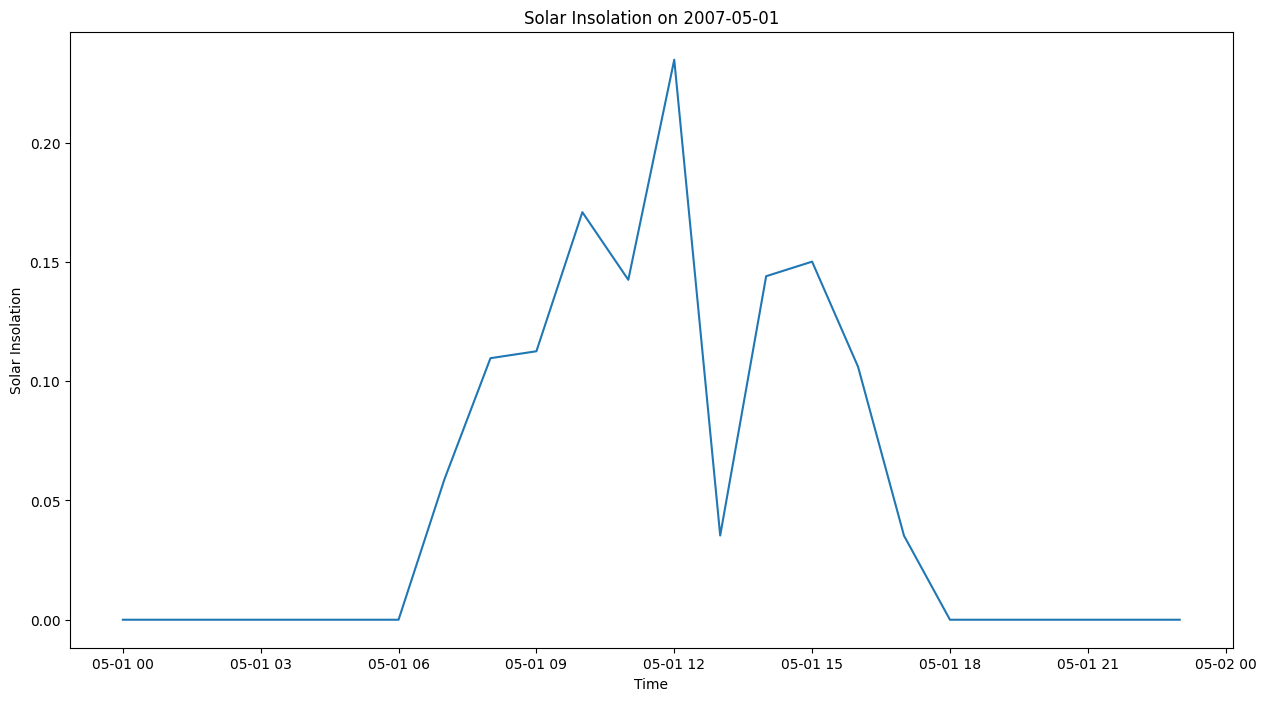

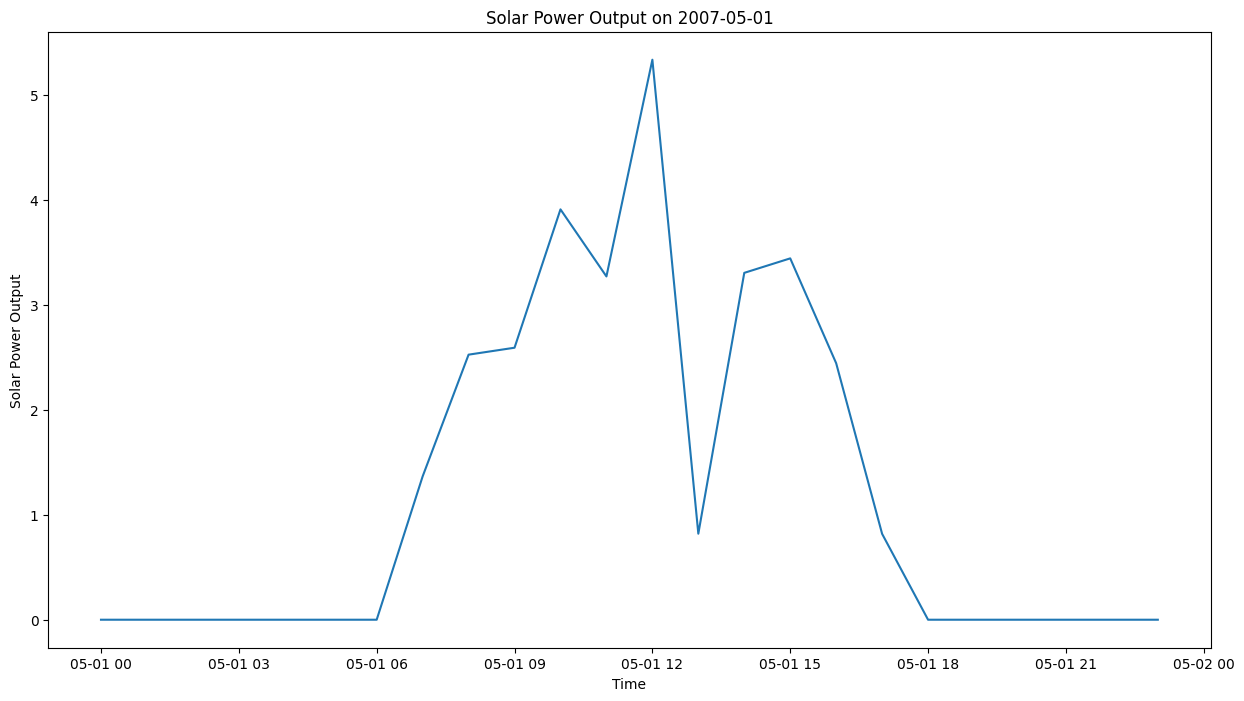

In [34]:
# Assuming 'Time' is your time column and is in datetime format
day_to_plot = '2007-05-01'  # Change this to the day you want to plot

# Filter the DataFrame to include only the specified day
df_day = df[df['Time'].dt.strftime('%Y-%m-%d') == day_to_plot]

features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation','Solar Power Output']

for feature in features:
    plt.figure(figsize=(15, 8))
    sns.lineplot(x="Time", y=feature, data=df_day)
    plt.title(f'{feature} on {day_to_plot}')
    plt.show()


#### *Scatter plot over a Year*

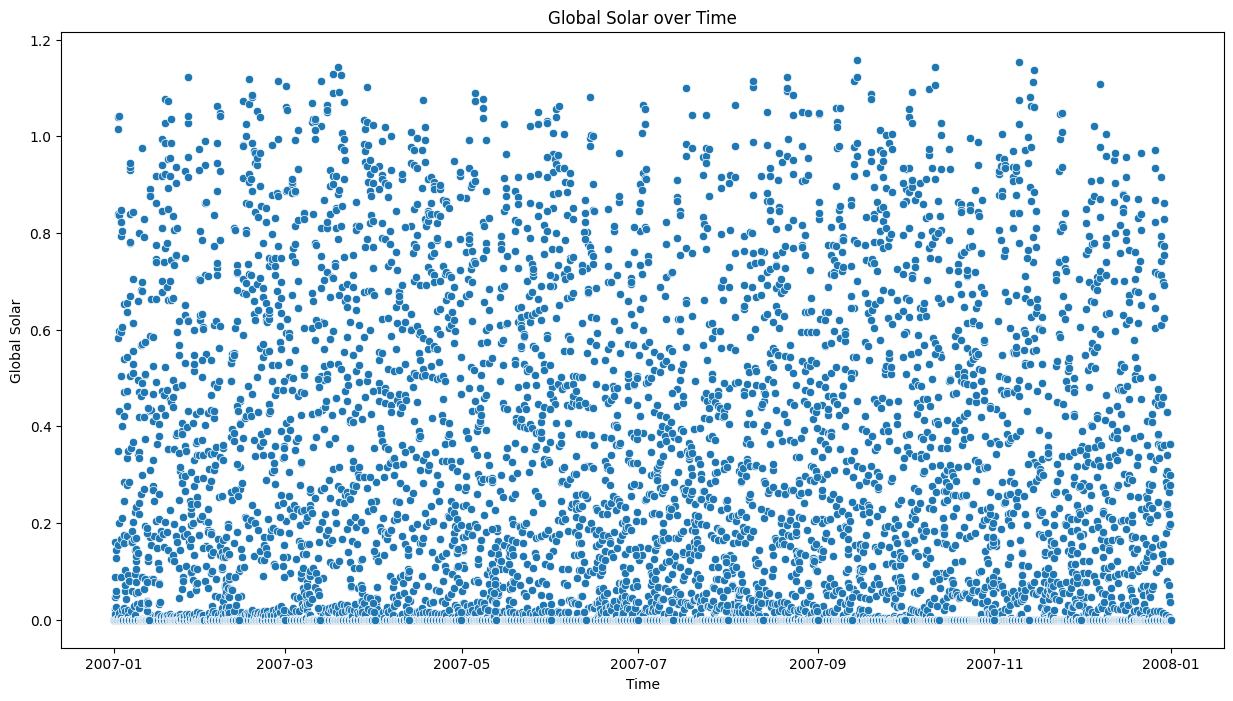

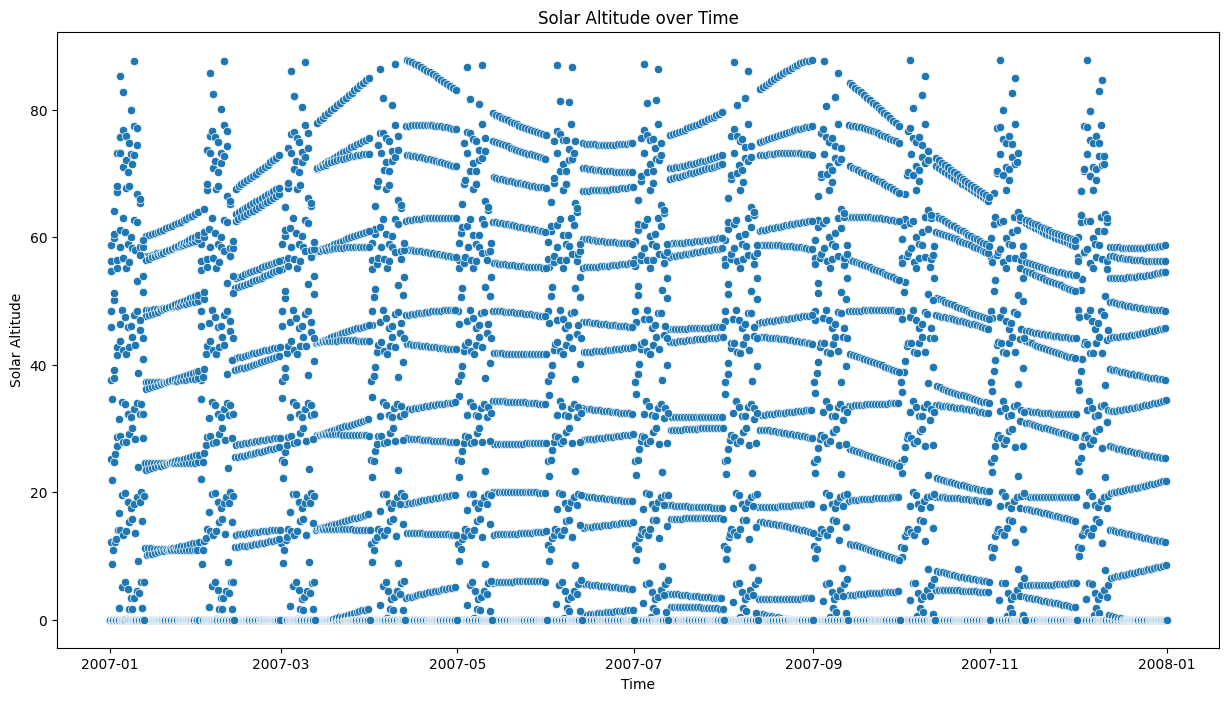

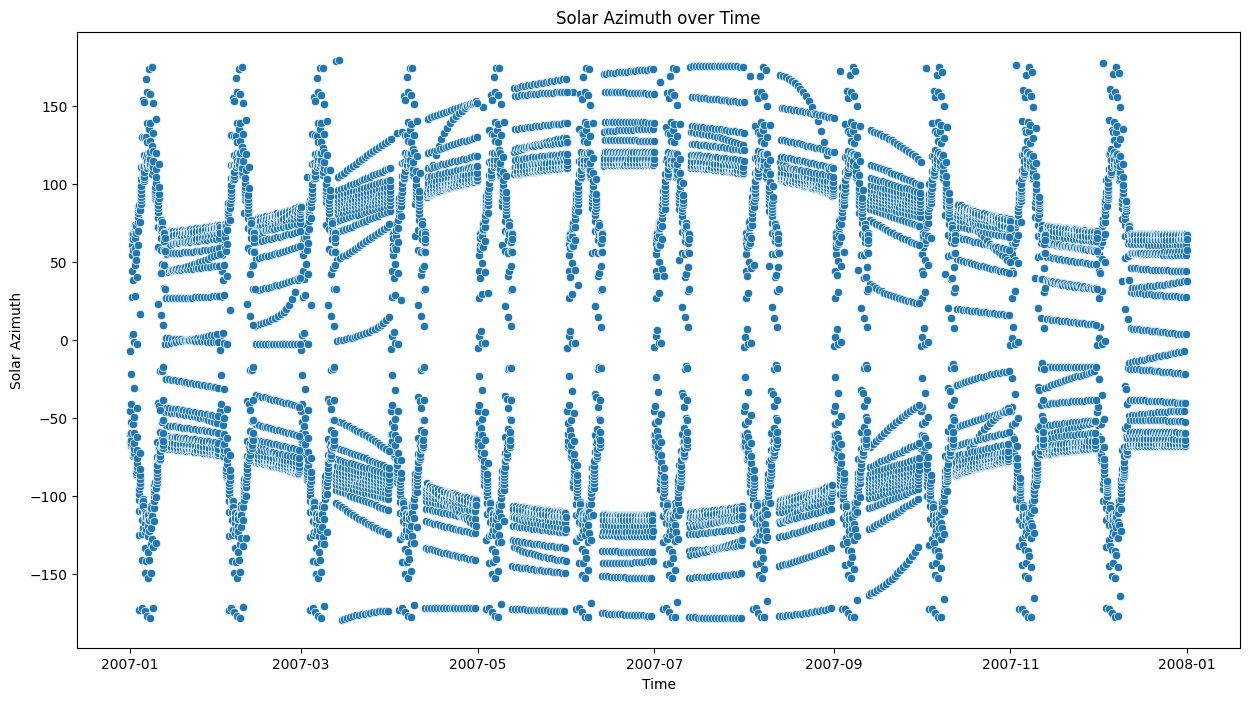

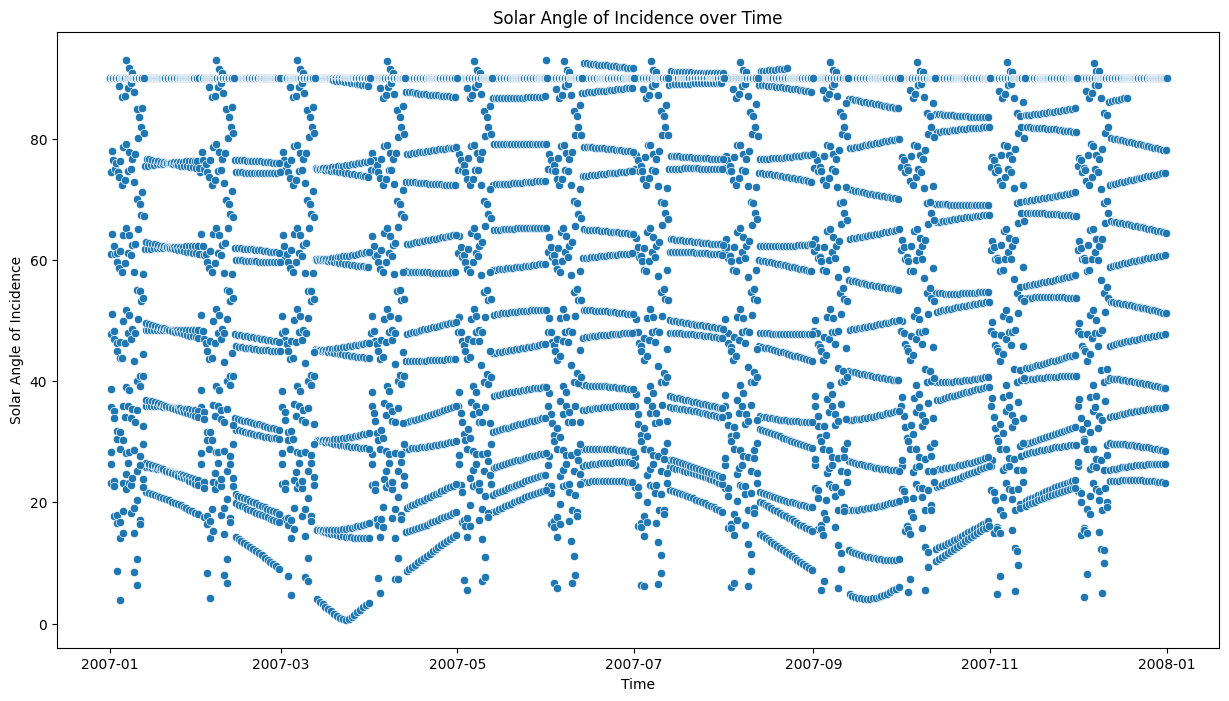

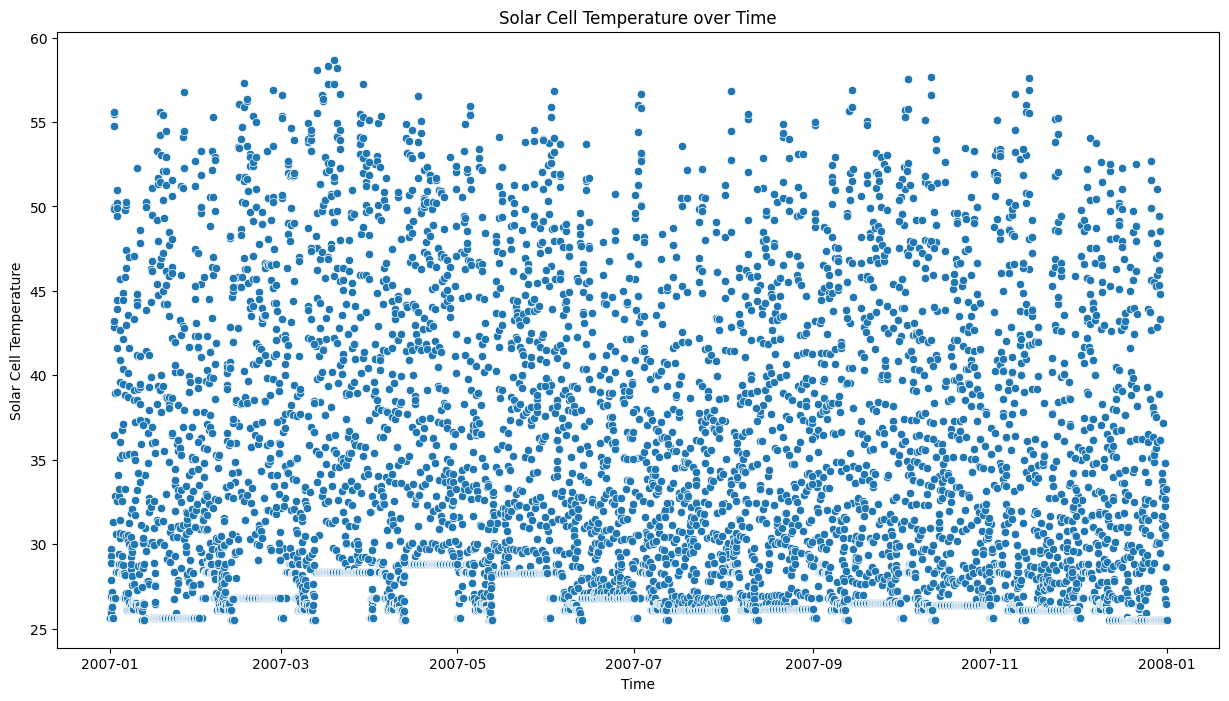

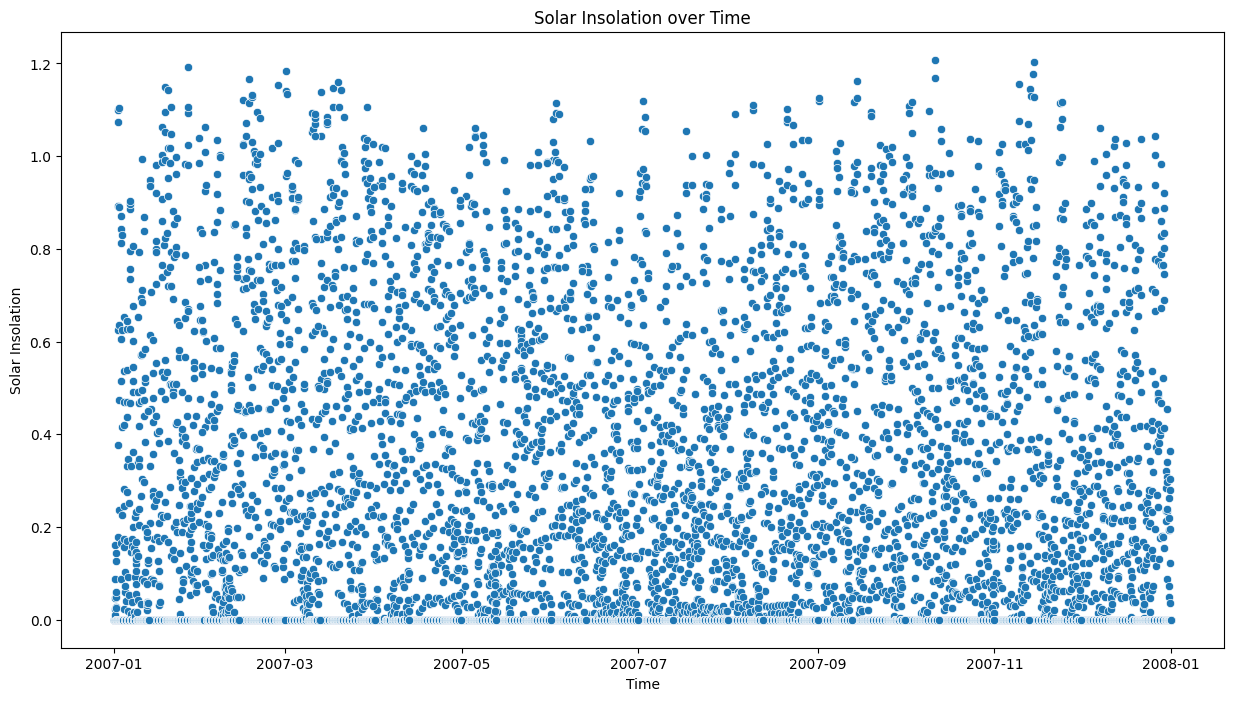

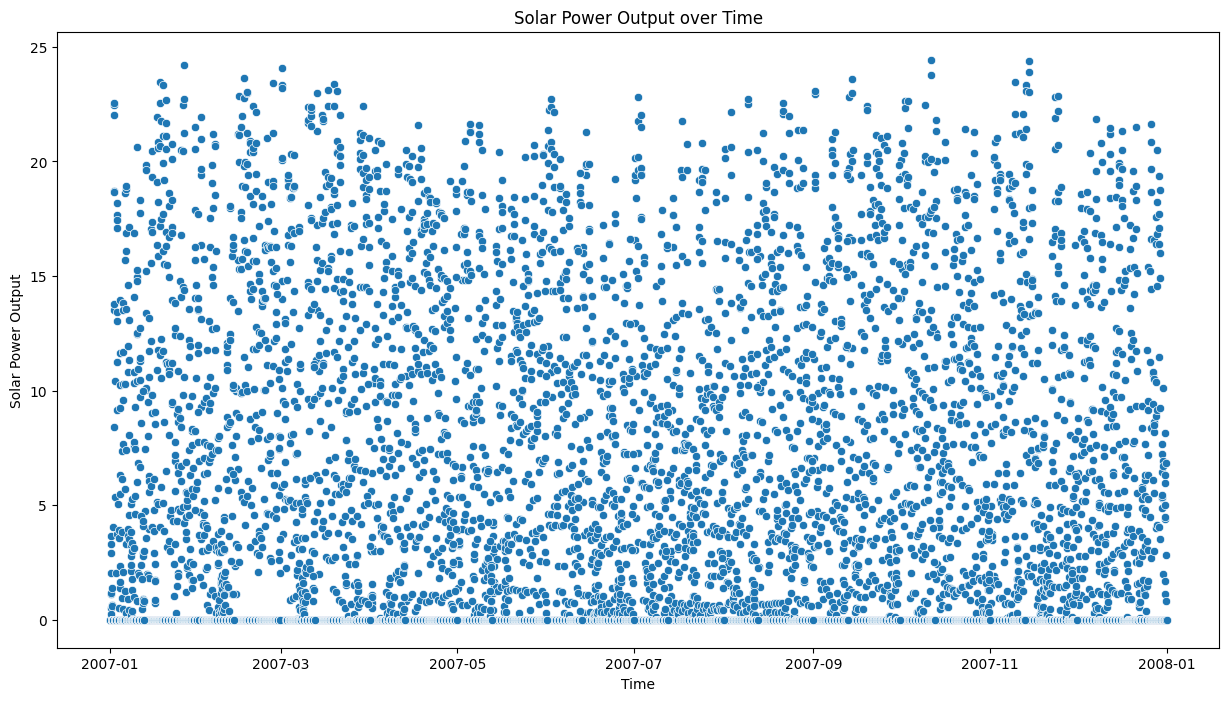

In [35]:
features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation','Solar Power Output']
for feature in features:
    plt.figure(figsize=(15, 8))
    sns.scatterplot(x="Time", y=feature, data=df)
    plt.title(f'{feature} over Time')
    plt.show()

#### *Scatter plot over a Day*

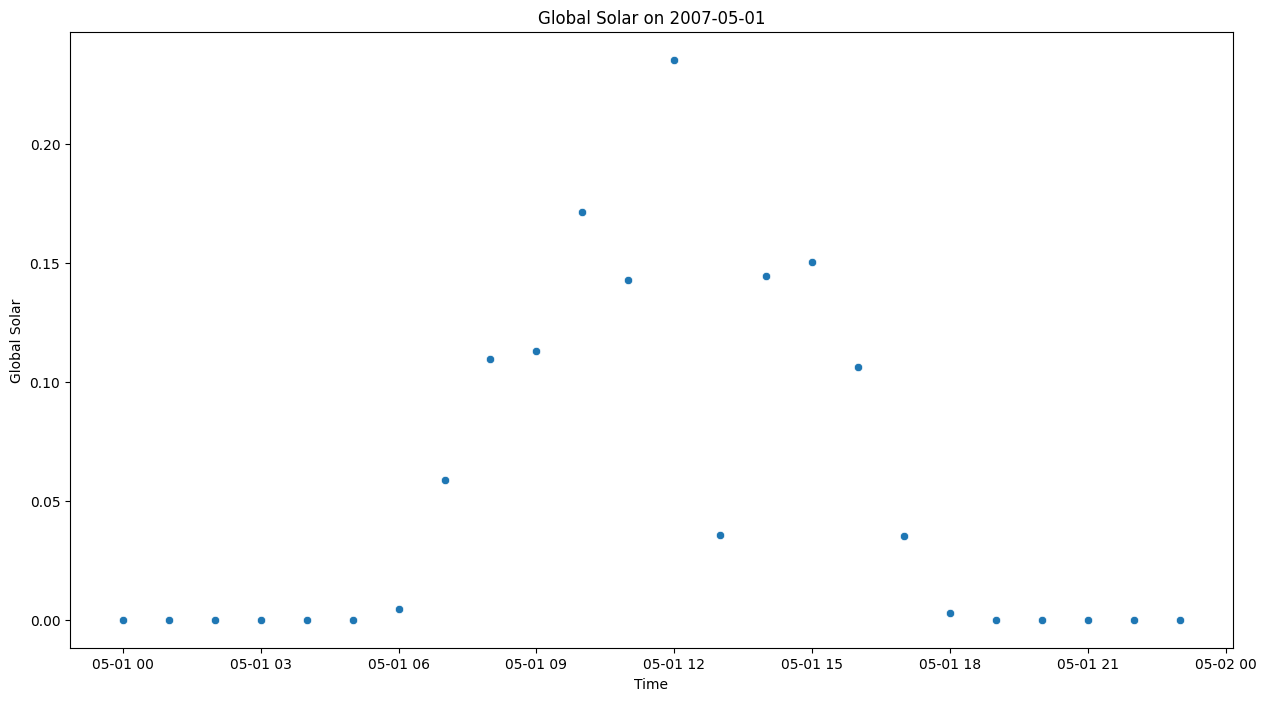

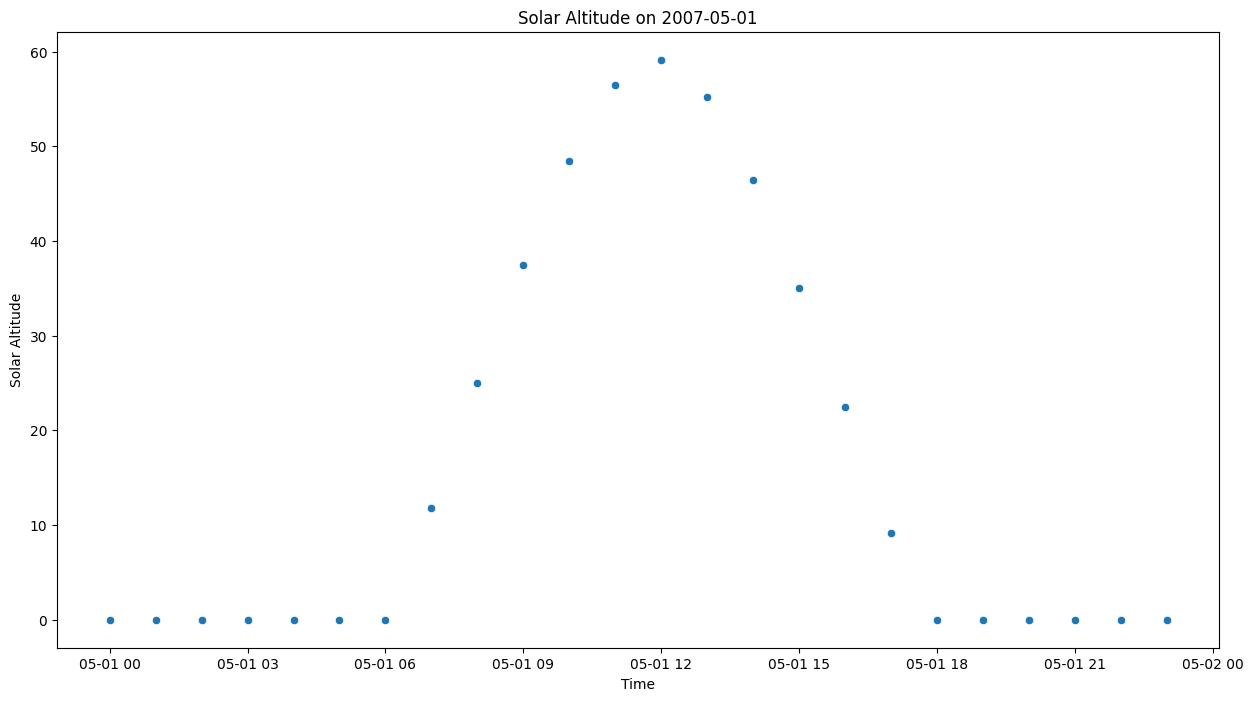

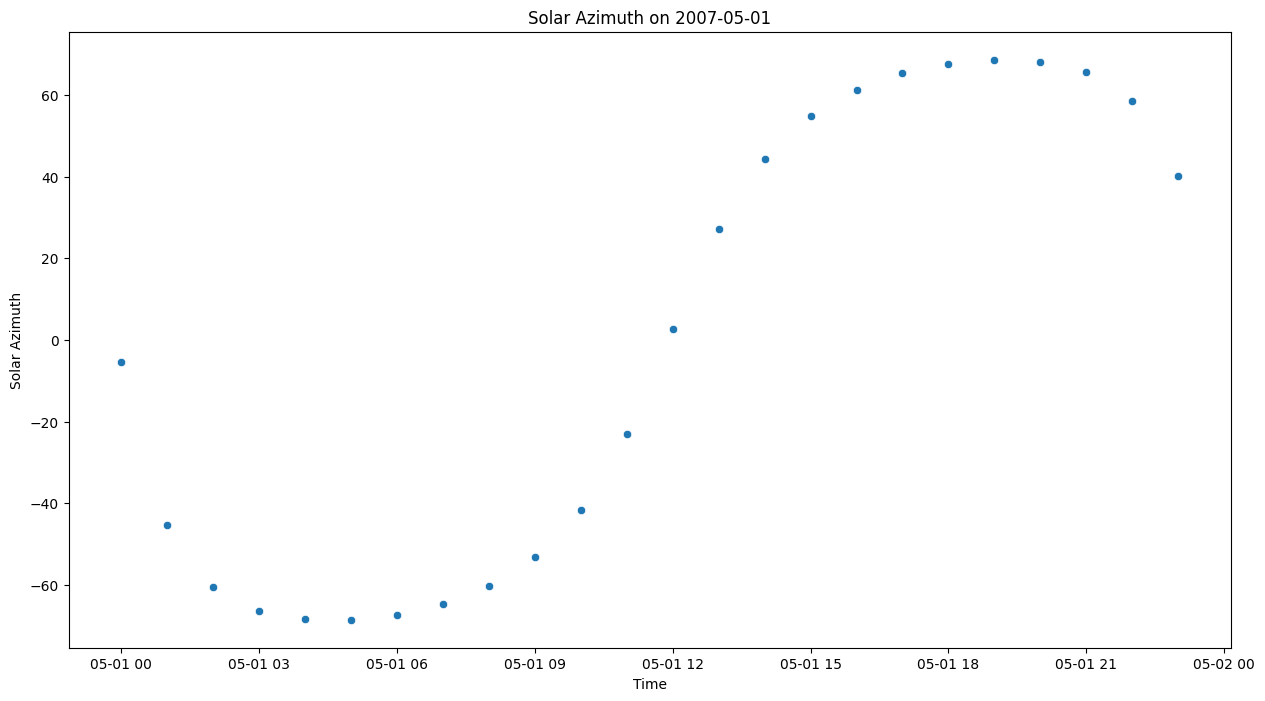

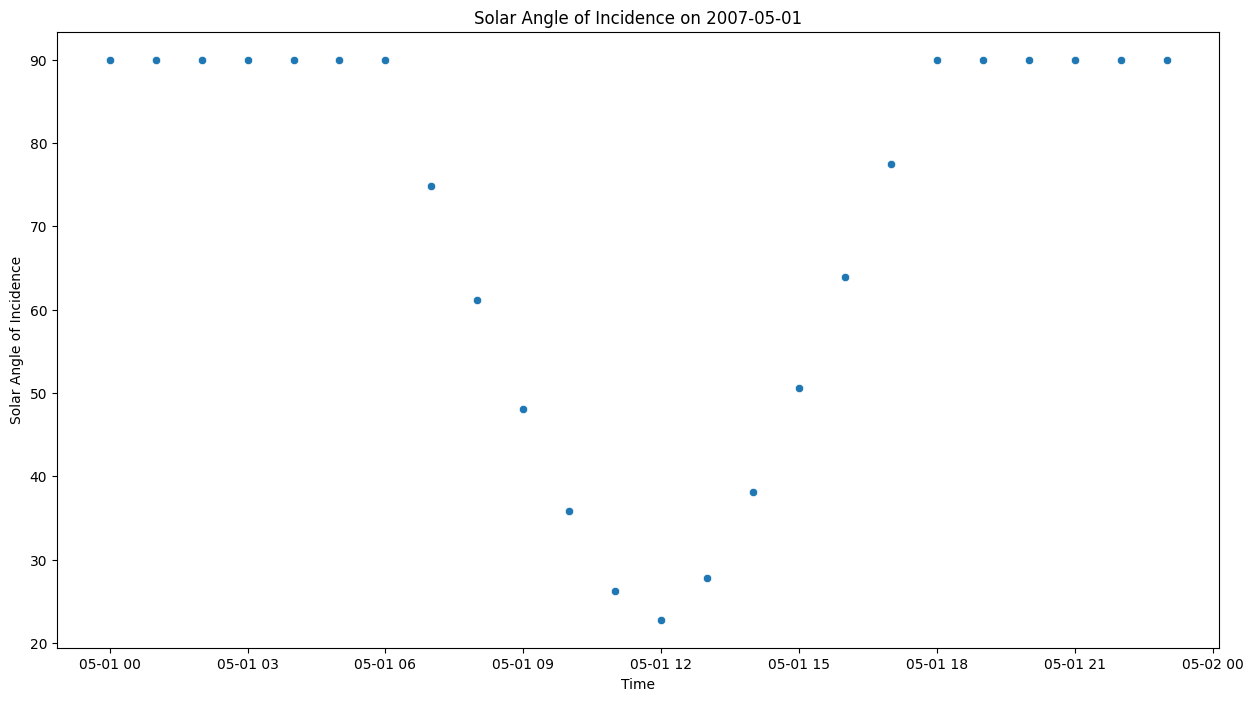

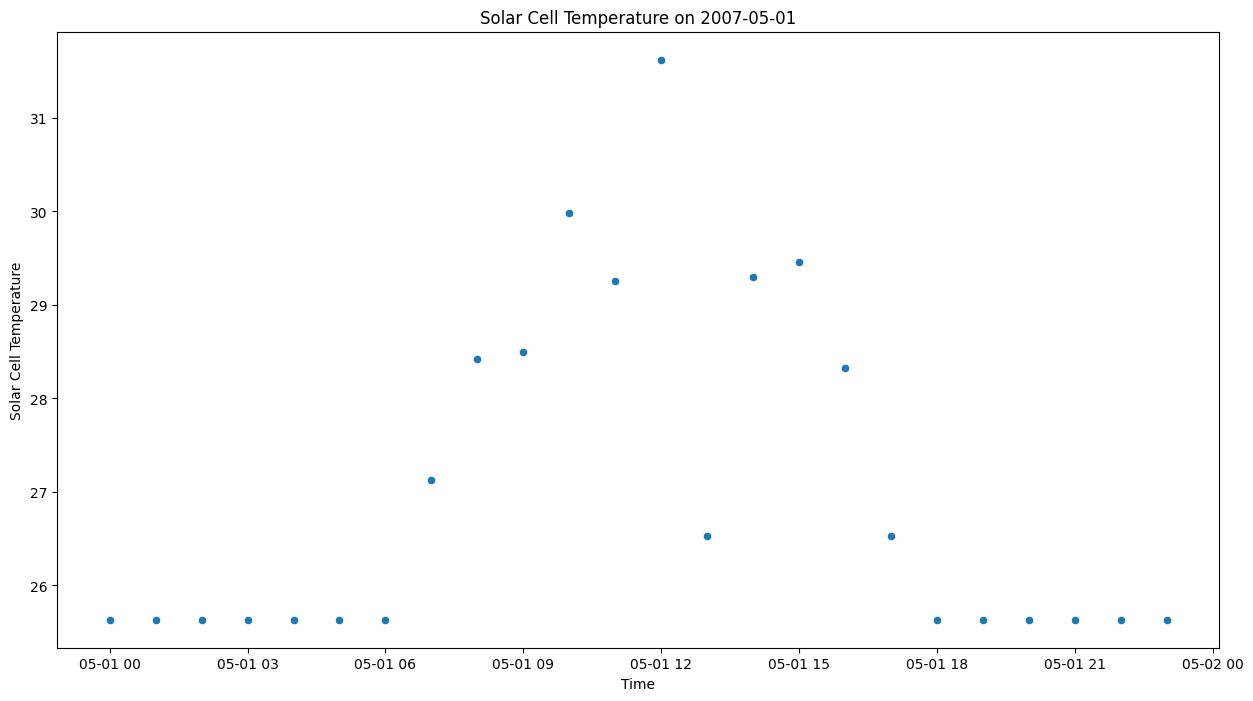

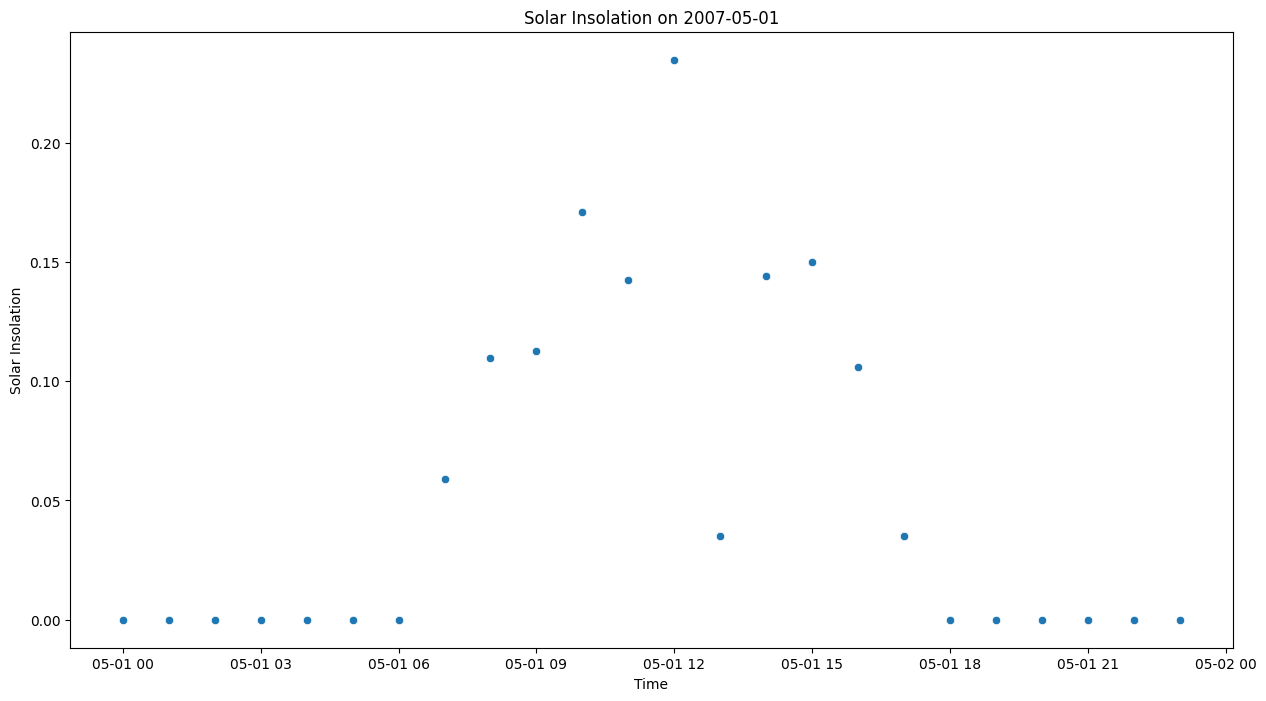

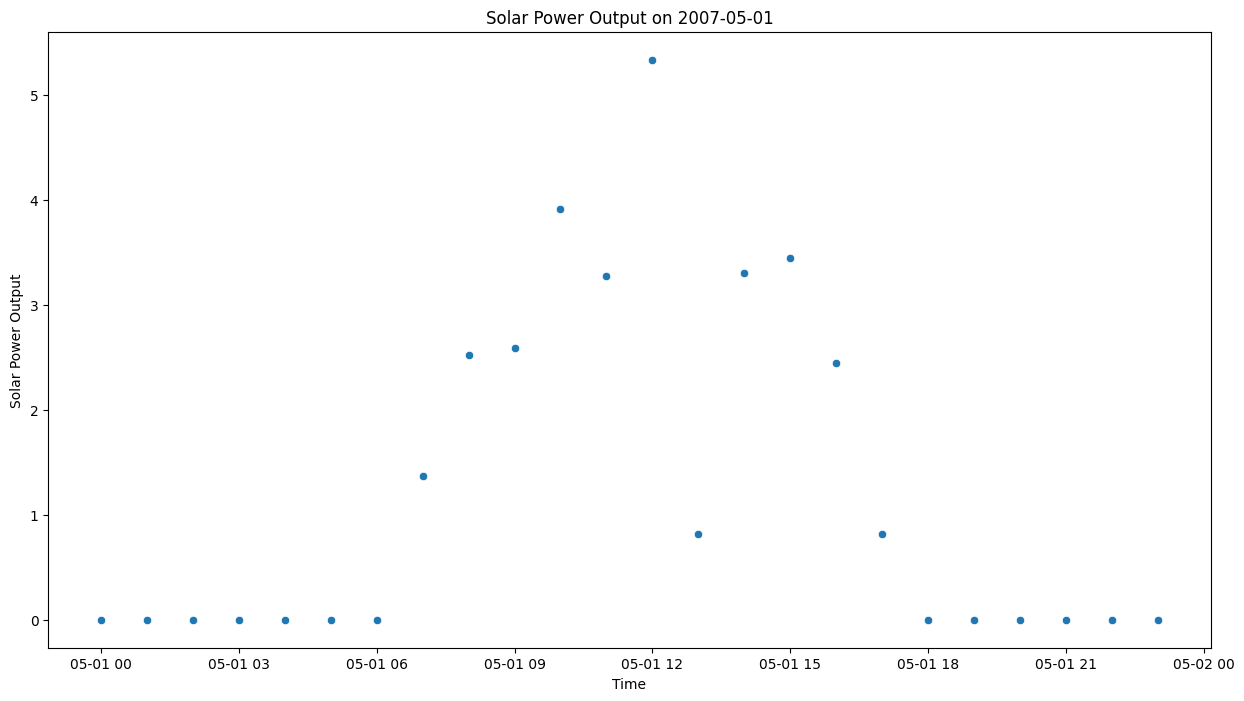

In [36]:
# Assuming 'Time' is your time column and is in datetime format
day_to_plot = '2007-05-01'  # Change this to the day you want to plot

# Filter the DataFrame to include only the specified day
df_day = df[df['Time'].dt.strftime('%Y-%m-%d') == day_to_plot]

features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation','Solar Power Output']

for feature in features:
    plt.figure(figsize=(15, 8))
    sns.scatterplot(x="Time", y=feature, data=df_day)
    plt.title(f'{feature} on {day_to_plot}')
    plt.show()


In [37]:
# copydf = df.copy()
# copydf.loc[copydf['Solar Azimuth'] > 0, 'Solar Azimuth'] += 180
# copydf.loc[copydf['Solar Azimuth'] < 0, 'Solar Azimuth'] += 180

In [38]:
# day_to_plot = '2007-05-01'  # Change this to the day you want to plot

# # Filter the DataFrame to include only the specified day
# df_day = copydf[copydf['Time'].dt.strftime('%Y-%m-%d') == day_to_plot]

# plt.figure(figsize=(15, 8))
# sns.scatterplot(x="Time", y="Solar Azimuth", data=df_day)
# plt.title(f'{feature} on {day_to_plot}')
# plt.show()

#### *Statistics about the Features*

In [39]:
df.describe()

Unnamed: 0                 Time  Global Solar  Solar Altitude  \
count  8760.000000                 8760   8760.000000     8760.000000   
mean   4379.500000  2007-07-02 11:30:00      0.204861       20.499226   
min       0.000000  2007-01-01 00:00:00      0.000000        0.000000   
25%    2189.750000  2007-04-02 05:45:00      0.000000        0.000000   
50%    4379.500000  2007-07-02 11:30:00      0.015372        0.000000   
75%    6569.250000  2007-10-01 17:15:00      0.351834       42.893260   
max    8759.000000  2007-12-31 23:00:00      1.158391       87.821980   
std    2528.938512                  NaN      0.295512       26.216744   

       Solar Azimuth  Solar Angle of Incidence  Solar Insolation  \
count    8760.000000               8760.000000       8760.000000   
mean       -0.631746                 69.312000          0.206069   
min      -179.376100                  0.645034          0.000000   
25%       -90.444960                 47.686585          0.000000   
50%        -0.002559                 90.000000          0.000000   
75%        89.596075                 90.000000          0.353436   
max       179.800300                 93.018400          1.207991   
std        96.711540                 26.442984          0.299409   

       Solar Power Output  Solar Cell Temperature  
count         8760.000000             8760.000000  
mean             4.449539               32.102284  
min              0.000000               25.522780  
25%              0.000000               26.422880  
50%              0.000000               28.323090  
75%              7.869895               35.821810  
max             24.436610               58.686180  
std              6.333296                7.884423

#### *Studying Outliers*

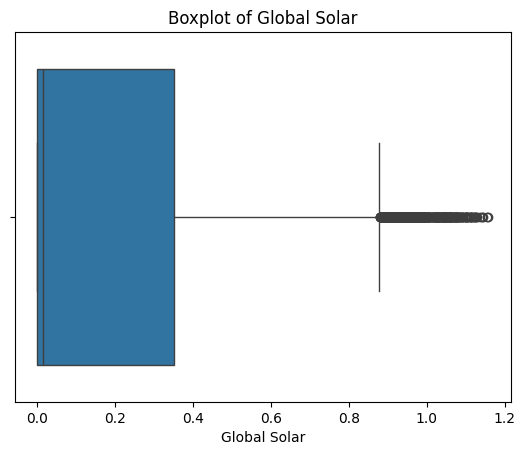

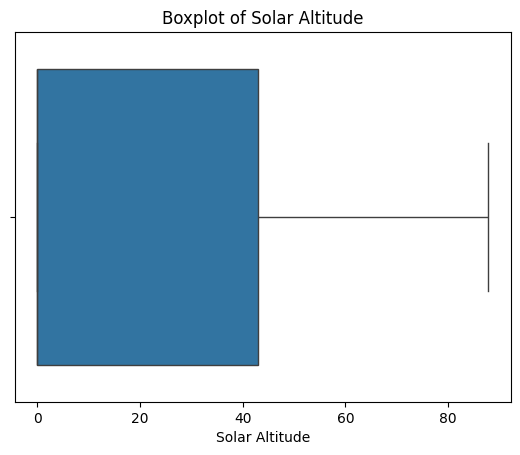

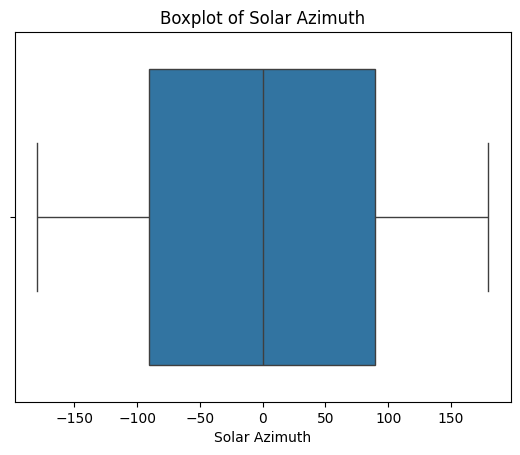

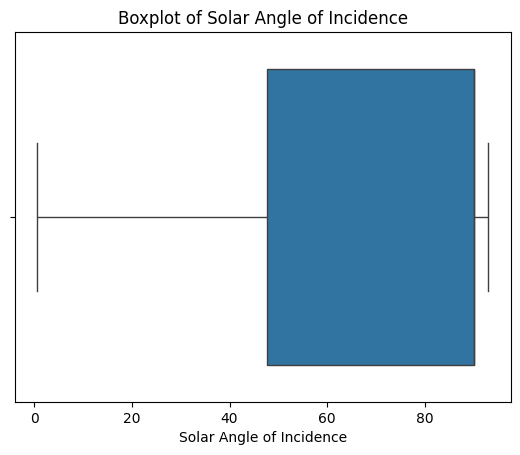

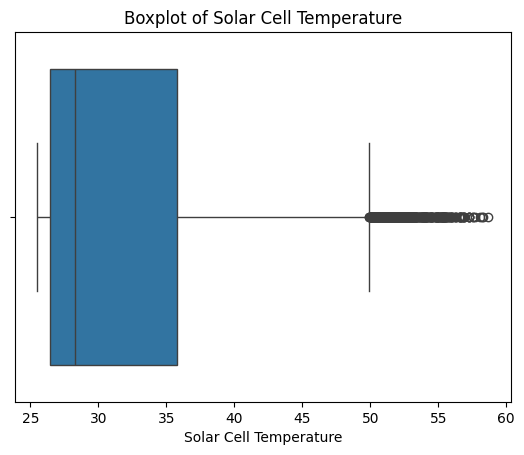

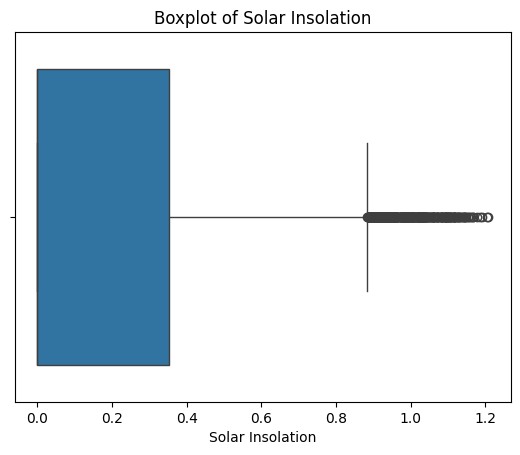

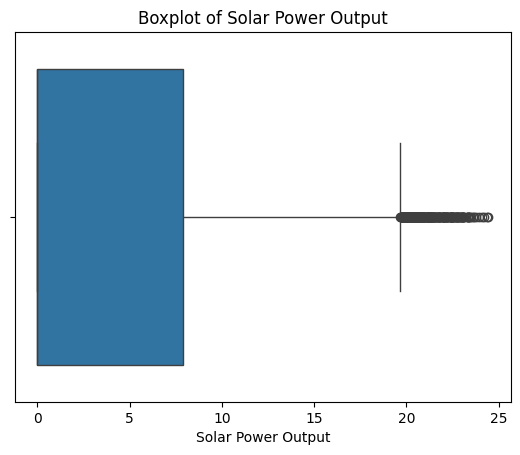

In [40]:
features = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation', 'Solar Power Output']

for feature in features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


##### *The features has valid outlier which are feasible in the real world and hence we are not removing them from the dataset*


# ***Splitting the Dataset***

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, train_test_split, KFold

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline


In [42]:
# Assuming 'Time' is your datetime column
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second

# Now you can drop the original 'Time' column
df = df.drop(columns=['Minute'],axis=1)
df = df.drop(columns=['Second'],axis=1)
df = df.drop(columns=['Time'],axis=1)

### Splitting the Data

In [43]:
x = df.drop("Solar Power Output", axis = 1)
y = df["Solar Power Output"]

In [44]:
# 60% Train - 20% Val - 20% Test
x_train_or, x_test, y_train_or, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_or, y_train_or, test_size=0.25)

In [45]:
x_train

Unnamed: 0  Global Solar  Solar Altitude  Solar Azimuth  \
7516        7516      0.000000         0.00000      -74.23137   
7803        7803      0.000000         0.00000      -70.15076   
3119        3119      0.000000         0.00000      155.83290   
8395        8395      0.000000         0.00000       68.03503   
8343        8343      0.529265        32.78277       55.55994   
...          ...           ...             ...            ...   
5055        5055      0.310926        44.26062      108.24460   
1309        1309      0.798801        66.70860       37.25973   
5577        5577      0.690864        47.10561      -99.10445   
7344        7344      0.000000         0.00000      -39.92161   
1933        1933      0.694359        72.31271       62.04469   

      Solar Angle of Incidence  Solar Insolation  Solar Cell Temperature  \
7516                  90.00000          0.000000                26.10284   
7803                  90.00000          0.000000                26.10284   
3119                  90.00000          0.000000                28.26308   
8395                  90.00000          0.000000                25.52278   
8343                  52.91728          0.582385                40.50889   
...                        ...               ...                     ...   
5055                  48.74331          0.308043                33.99100   
1309                  17.51323          0.822067                48.08712   
5577                  44.75140          0.672304                43.51157   
7344                  90.00000          0.000000                26.10284   
1933                  15.57265          0.697647                46.37400   

      Year  Month  Day  Hour  
7516  2007     10   11     4  
7803  2007     11   22     3  
3119  2007     10    5    23  
8395  2007     12   16    19  
8343  2007     12   14    15  
...    ...    ...  ...   ...  
5055  2007      7   30    15  
1309  2007      2   24    13  
5577  2007      8   21     9  
7344  2007      3   11     0  
1933  2007      3   22    13  

[5256 rows x 11 columns]

#### *Defining a Function to Evaluate the Model*

In [46]:
def get_metrics(model):
    train_score = model.score(x_train, y_train)
    val_score = model.score(x_val,y_val)
    mae = mean_absolute_error(y_val,model.predict(x_val))
    mse = mean_squared_error(y_val,model.predict(x_val))
    rmse = np.sqrt(mean_squared_error(y_val,model.predict(x_val)))
    r2 = np.sqrt(r2_score(y_val,model.predict(x_val)))
                              
    print(f'Train score {train_score}')
    print(f'Val score {val_score}')
    print("MAE:" , mae )
    print("MSE:" , mse)
    print("RMSE:" , rmse)
    print("R2:" , r2)
    return val_score
    

# ***Model Training***

### ***Linear Regression***

In [47]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_val_score =get_metrics(lr)

Train score 0.9991830070860886
Val score 0.9991912195990073
MAE: 0.12608839939466776
MSE: 0.03302433744681738
RMSE: 0.18172599551747512
R2: 0.9995955280007045


### ***Polynomial Regression***

In [48]:
poly_val_score = []
for degree in [1,2,3,4,5]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(x_train, y_train)
    print("-"*20)
    print("Degree", degree)
    val_score = get_metrics(poly)
    poly_val_score.append(val_score)

--------------------
Degree 1
Train score 0.9991830070860886
Val score 0.9991912195990073
MAE: 0.1260883993946702
MSE: 0.03302433744681719
RMSE: 0.18172599551747456
R2: 0.9995955280007045
--------------------
Degree 2
Train score 0.9999999999999382
Val score 0.9999999999999429
MAE: 7.488608118310883e-07
MSE: 2.3280470944185167e-12
RMSE: 1.5257939226574854e-06
R2: 0.9999999999999715
--------------------
Degree 3
Train score 0.9999999999999434
Val score 0.9999999999999363
MAE: 8.249557975930604e-07
MSE: 2.6013322559748393e-12
RMSE: 1.612864611793203e-06
R2: 0.9999999999999681
--------------------
Degree 4
Train score 0.999999999999955
Val score 0.9999999999999126
MAE: 9.11347621273426e-07
MSE: 3.566277841131415e-12
RMSE: 1.8884591182049493e-06
R2: 0.9999999999999563
--------------------
Degree 5
Train score 0.9999999999999608
Val score 0.9999999999998794
MAE: 1.1468149028100793e-06
MSE: 4.924034405340855e-12
RMSE: 2.2190165401233167e-06
R2: 0.9999999999999397


In [49]:
poly_val_score

[0.9991912195990073,
 0.9999999999999429,
 0.9999999999999363,
 0.9999999999999126,
 0.9999999999998794]

### ***Lasso Regression***

In [50]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
lasso_val_score = get_metrics(lasso_model)

Train score 0.9843368821218453
Val score 0.9846084829521722
MAE: 0.6076763953756366
MSE: 0.6284705368503051
RMSE: 0.7927613366267966
R2: 0.9922743990208415


In [51]:
lasso_val_score

0.9846084829521722

### ***Ridge Regression***

In [52]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
ridge_val_score = get_metrics(ridge_model)

Train score 0.9988949954968646
Val score 0.9989033526688976
MAE: 0.14368095345446744
MSE: 0.044778596857718705
RMSE: 0.21160953867375332
R2: 0.9994515259225419


In [53]:
ridge_val_score

0.9989033526688976

### ***Elastic Net Model***

In [54]:
EN_model = ElasticNet(alpha=1)
EN_model.fit(x_train, y_train)
en_val_score = get_metrics(EN_model)

Train score 0.9844211475969278
Val score 0.9847177236611279
MAE: 0.6052024675042019
MSE: 0.6240099910321146
RMSE: 0.7899430302446593
R2: 0.9923294431090554


In [55]:
en_val_score

0.9847177236611279

### ***Random Forest Regression***

In [56]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_val_score = get_metrics(rf)

Train score 0.9999959165495306
Val score 0.999974329148096
MAE: 0.014949848348116482
MSE: 0.0010481990844269286
RMSE: 0.032375902835703727
R2: 0.9999871644916729


### ***Decision Tree Regression***

In [57]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_val_score = get_metrics(dt)

Train score 1.0
Val score 0.9999511881287181
MAE: 0.01925445008561643
MSE: 0.001993099371157986
RMSE: 0.04464414150992251
R2: 0.9999755937665269


### ***eXtreme Gradient Boosting Regression***

In [58]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_val_score = get_metrics(xgb)

Train score 0.9999971155814588
Val score 0.9999684114909373
MAE: 0.017876032968356395
MSE: 0.0012898304427851055
RMSE: 0.03591420948294847
R2: 0.9999842056207374


In [59]:
x_test

Unnamed: 0  Global Solar  Solar Altitude  Solar Azimuth  \
196          196      0.000000         0.00000      -68.87798   
4512        4512      0.000000         0.00000     -177.49680   
805          805      0.532810        61.04296       28.93632   
1774        1774      0.000000         0.00000       97.54884   
3221        3221      0.000000         0.00000     -110.18020   
...          ...           ...             ...            ...   
1842        1842      0.015836         0.00000       88.04160   
3491        3491      0.634856        72.96059     -140.10170   
4877        4877      0.000000         0.00000     -112.37250   
2210        2210      0.000000         0.00000     -110.58100   
4000        4000      0.226294        28.36532      112.18580   

      Solar Angle of Incidence  Solar Insolation  Solar Cell Temperature  \
196                   90.00000          0.000000                25.63279   
4512                  90.00000          0.000000                26.11284   
805                   22.19633          0.540483                40.69321   
1774                  90.00000          0.000000                28.32309   
3221                  90.00000          0.000000                28.26308   
...                        ...               ...                     ...   
1842                  90.00000          0.000000                28.32309   
3491                  23.79963          0.621436                44.31115   
4877                  90.00000          0.000000                26.11284   
2210                  90.00000          0.000000                28.82314   
4000                  64.93697          0.222080                32.47444   

      Year  Month  Day  Hour  
196   2007      9    1     4  
4512  2007      8    7     0  
805   2007      3    2    13  
1774  2007      3   15    22  
3221  2007      5   15     5  
...    ...    ...  ...   ...  
1842  2007      3   18    18  
3491  2007      5   26    11  
4877  2007      7   23     5  
2210  2007      3    4     2  
4000  2007      6   16    16  

[1752 rows x 11 columns]

In [60]:
y_test

196      0.00000
4512     0.00000
805     11.81327
1774     0.00000
3221     0.00000
          ...   
1842     0.00000
3491    13.36731
4877     0.00000
2210     0.00000
4000     5.02878
Name: Solar Power Output, Length: 1752, dtype: float64

In [ ]:
#     'Model': ['Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Ridge Regression','Elastic Net Model','Random Forest Regression', 'Decision Tree Regression', 'XGB Regression'],


Text(0, 0.5, 'Accuracy')

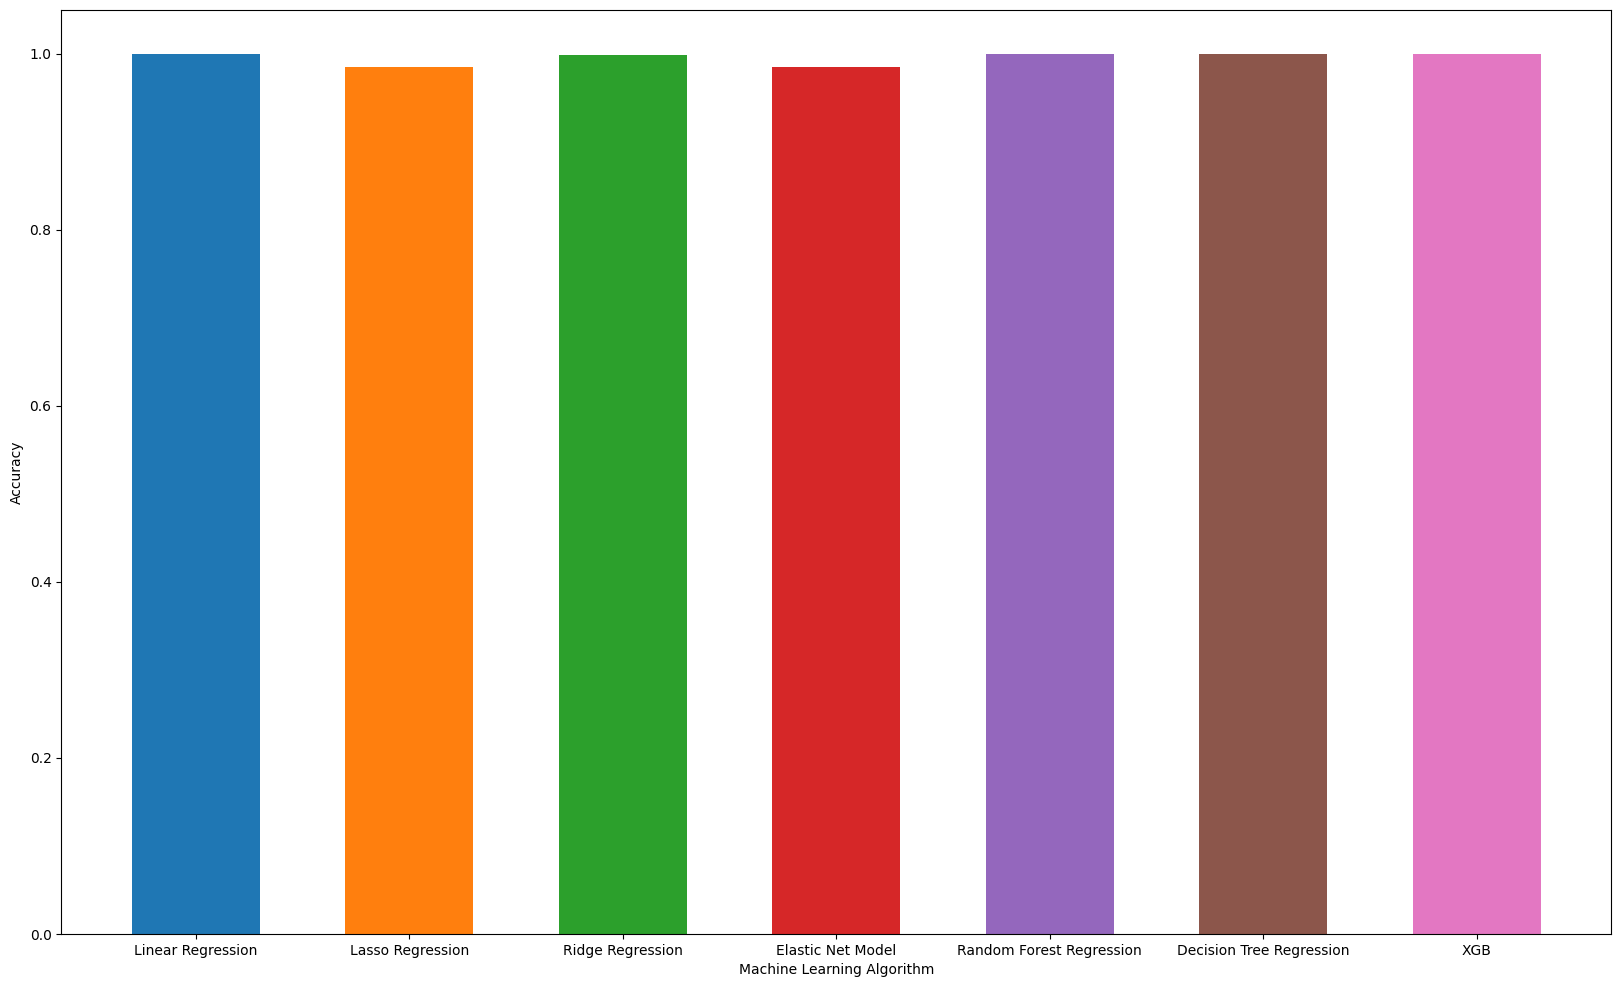

In [62]:
plt.figure(figsize=(20, 12))
plt.bar("Linear Regression",lr_val_score,width=0.6)
# plt.bar("Polynomial Regression D1",poly_val_score[0],width=0.6)
# plt.bar("Polynomial Regression D2",poly_val_score[1],width=0.6)
# plt.bar("Polynomial Regression D3",poly_val_score[2],width=0.6)
# plt.bar("Polynomial Regression D4",poly_val_score[3],width=0.6)
# plt.bar("Polynomial Regression D5",poly_val_score[4],width=0.6)
plt.bar("Lasso Regression",lasso_val_score,width=0.6)
plt.bar("Ridge Regression",ridge_val_score,width=0.6)
plt.bar("Elastic Net Model",en_val_score,width=0.6)
plt.bar("Random Forest Regression",rf_val_score,width=0.6)
plt.bar("Decision Tree Regression",dt_val_score,width=0.6)
plt.bar("XGB",xgb_val_score,width=0.6)

plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")

In [63]:
poly_val_score

[0.9991912195990073,
 0.9999999999999429,
 0.9999999999999363,
 0.9999999999999126,
 0.9999999999998794]

 'Polynomial Regression D1', 'Polynomial Regression D2', 'Polynomial Regression D3', 'Polynomial Regression D4', 'Polynomial Regression D5',
 100*round(poly_val_score[0],4), 100*round(poly_val_score[1],4), 100*round(poly_val_score[2],4), 100*round(poly_val_score[3],4), 100*round(poly_val_score[4],4),

In [64]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression','Elastic Net Model','Random Forest Regression', 'Decision Tree Regression', 'XGB Regression'],
    'Score': [100*lr_val_score.round(4), 100*round(lasso_val_score,4), 100*round(ridge_val_score,4), 100*round(en_val_score,4), 
              100*round(rf_val_score,4), 100*round(dt_val_score,4), 100*round(xgb_val_score,4)]
})
models.sort_values(by = 'Score', ascending = False)

Model   Score
4  Random Forest Regression  100.00
5  Decision Tree Regression  100.00
6            XGB Regression  100.00
0         Linear Regression   99.92
2          Ridge Regression   99.89
3         Elastic Net Model   98.47
1          Lasso Regression   98.46

# ***Model Saving***

In [65]:
import pickle

with open("solar_rf.pkl","wb") as file:
    pickle.dump(rf, file)

# ***Prediction***

In [ ]:
global_solar_incidence = float(input("Enter Global Solar Incidence: "))
solar_altitude = float(input("Enter Solar Altitude: "))
solar_azimuth_angle = float(input("Enter Solar Azimuth Angle: "))
solar_angle_of_incidence = float(input("Enter Solar Angle of Incidence: "))
solar_cell_temp = float(input("Enter Solar Cell Temperature: "))
solar_insolation = float(input("Enter Solar Insolation: "))
year = float(input("Enter Year: "))
month = float(input("Enter Month: "))
day = float(input("Enter Day: "))
hour = float(input("Enter Hour: "))
minute = float(input("Enter Minute: "))
seconds = float(input("Enter Seconds: "))

input_data = (global_solar_incidence, solar_altitude, solar_azimuth_angle, solar_angle_of_incidence, solar_cell_temp, solar_insolation, year, month, day, hour, minute, seconds)

feature_names = ['Global Solar', 'Solar Altitude', 'Solar Azimuth',
       'Solar Angle of Incidence', 'Solar Cell Temperature',
       'Solar Insolation', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']

input_df = pd.DataFrame([input_data],columns=feature_names)
predicted_solar_power = rf.predict(input_df)

print('Predicted Solar Power Output (with 0.015591526731678176 error): ', predicted_solar_power)
